# AC Price Analysis using Webscrapping (Flipkart Data)

In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import re
from bs4 import BeautifulSoup

# 1. Website URL

In [ ]:
url = "https://www.flipkart.com/search?q=air%20conditioner&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off"

# 1.1 Sending Request to scrap the data from website

In [4]:
page = requests.get(url)
page

<Response [200]>

# 1.2 converting HTML into readable text

In [ ]:
soup = BeautifulSoup(page.text)
soup

# 1.3 Webscraping code to get the data from Website

In [145]:
price = []
brand = []
model = []
ton = []
star = []
inv = []
units = []
room_size = []
ai = []

for i in range(1,77):
    url = ("https://www.flipkart.com/search?q=air+conditioner&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page="+str(i))
    print(url)

    a = soup.find_all("div",class_="Nx9bqj _4b5DiR")
    b = soup.find_all("div",class_="KzDlHZ")
    c = soup.find_all("li",class_="J+igdf")
    
    # Price
    for i in a:
        price.append(i.text)

    #Brand
    for i in b:
        brand.append(re.findall(r"\b^\w+",i.text)[0])

    #model
    for i in b:
        q = re.findall(r"[20]{1}[0-9]{3}",i.text)
        if len(q)>0:
            model.append(q[0])
        else:
            model.append(np.nan)

    #ton
    for i in b:
        ton.append(re.findall(r"(\d+(?:\.\d+)?)\s*Ton",i.text,flags=re.I)[0])

    #star
    for i in b:
        star.append(re.findall(r"(\d+)\s\Star",i.text)[0])
    
    #Inverter
    for i in b:
        a = re.search(r"Split Inverter",i.text,flags=re.I)
        if a:
            inv.append("Yes")
        else:
            inv.append("No")

    #units
    for i in c:
        x = re.findall(r"(\d+(?:\.\d+)?)\s*(?:Units|kWh)", i.text, flags=re.I)
        if len(x)>0:
            units.append(x[0])

    #Room_Size
    for i in c:
        x = re.findall(r"Room Size:(.*)",i.text)
        if len(x)>0:
            room_size.append(x[0])

    # AI
    for i in b:
        a = re.search("AI",i.text)
        if a:
            ai.append("Yes")
        else:
            ai.append("No")
        


print(len(price))
print(len(brand))
print(len(model))
print(len(ton))
print(len(star))
print(len(inv))
print(len(units))
print(len(room_size))
print(len(ai))

https://www.flipkart.com/search?q=air+conditioner&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=1
https://www.flipkart.com/search?q=air+conditioner&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=2
https://www.flipkart.com/search?q=air+conditioner&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=3
https://www.flipkart.com/search?q=air+conditioner&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=4
https://www.flipkart.com/search?q=air+conditioner&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=5
https://www.flipkart.com/search?q=air+conditioner&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=6
https://www.flipkart.com/search?q=air+conditioner&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=7
https://www.flipkart.com/search?q=air+conditioner&otracker=search&otracker1=search&marketplace=FL

# 1.4 List to Dictionary

In [155]:
Data = {"Brand":brand,
     "Model":model,
     "Capacity":ton,
     "Star":star,
     "Inverter":inv,
     "Units":units,
     "Size":room_size,
      "Price":price,
      "AI":ai}

# 1.5 Data in Data Frame Formate

In [156]:
df = pd.DataFrame(Data)
df

,Brand,Model,Capacity,Star,Inverter,Units,Size,Price
0,Voltas,2024,1,5,Yes,511.13,90 sqft or Below,"₹30,620"
1,MarQ,2025,0.75,3,Yes,553.16,90 sqft or Below,"₹19,490"
2,Midea,2025,1,3,Yes,685.62,90 sqft or Below,"₹25,990"
3,Voltas,2024,1.5,3,Yes,975.26,111 - 150 sqft,"₹28,990"
4,MarQ,2025,1,3,Yes,684.9,90 sqft or Below,"₹21,990"
...,...,...,...,...,...,...,...,...
1819,LG,2025,1.5,5,No,744.75,111 - 150 sqft,"₹41,490"
1820,realme,2025,1.5,5,Yes,781.88,111 - 150 sqft,"₹28,990"
1821,Godrej,2025,1.5,5,Yes,728.31,111 - 150 sqft,"₹33,990"
1822,IFB,2025,2,3,Yes,1252.53,151 - 200 sqft,"₹40,590"


# Saving the data 

In [ ]:
# df.to_csv("AC_cleaned.csv")

# Reading the svaed Data

In [5]:
#df = pd.read_csv(r"AC_cleaned.csv")
df = df.drop("Unnamed: 0",axis = 1)

# Checking the data is loaded correctly or not

In [10]:
df.head()

,Brand,Model,Capacity,Star,Inverter,Units,AI,Size,Price
0,Voltas,2024,1.00,5,Yes,511.13,No,90 sqft or Below,30620
1,MarQ,2025,0.75,3,Yes,553.16,No,90 sqft or Below,19490
2,Midea,2025,1.00,3,Yes,685.62,Yes,90 sqft or Below,25990
3,Voltas,2024,1.50,3,Yes,975.26,No,111 - 150 sqft,28990
4,MarQ,2025,1.00,3,Yes,684.90,No,90 sqft or Below,21990


# To get the Information about the Dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1824 entries, 0 to 1823
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Brand      1824 non-null   object 
 1   Model      1824 non-null   int64  
 2   Capacity   1824 non-null   float64
 3   Star       1824 non-null   int64  
 4   Inverter   1824 non-null   object 
 5   Units      1824 non-null   float64
 6   AI         1824 non-null   object 
 7   Size       1824 non-null   object 
 8   Price_tag  1824 non-null   object 
 9   Price      1824 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 142.6+ KB


## Observation
 - It gives brief information about the dataset.
 - we can see no of rows and columns thet is **1824 * 8**

# 2. Cleaning the Data

# 2.1 Missing value Teratment

In [6]:
df.isnull().sum()

Brand        0
Model        0
Capacity     0
Star         0
Inverter     0
Units        0
AI           0
Size         0
Price_tag    0
Price        0
dtype: int64

# 2.1.1 percentage of missing values

In [7]:
df.isnull().sum()/len(df)*100

Brand        0.0
Model        0.0
Capacity     0.0
Star         0.0
Inverter     0.0
Units        0.0
AI           0.0
Size         0.0
Price_tag    0.0
Price        0.0
dtype: float64

# Observation
 - we can see there are now missing values in my data
 - if there are missing values we will use abow code
 - | % Missing | Recommended Action                                      |
| :-------: | :------------------------------------------------------ |
|    0–5%   | Can fill (impute) missing values                        |
|   5–30%   | Consider imputation; if not critical, drop missing rows |
|    >30%   | Usually drop the column (too much missing data)         |

# 2.2 Removing Duplicates

In [16]:
df.duplicated().sum()

1800

### Observation :-
- The dataset reports 1800 duplicates, but in reality, there are no duplicate rows.

# 2.3 Type Conversion

In [168]:
df["Price"] = df["Price"].str.replace("₹","").str.replace(",","").astype(int)

In [174]:
df["Star"] = df["Star"].astype(int)

In [177]:
df["Capacity"] = df["Capacity"].astype(float)

In [180]:
df["Units"] = df["Units"].astype(float)

In [192]:
df["Model"] = df["Model"].fillna(df["Model"].mode()[0])

In [11]:
df["Model"] = df["Model"].astype("object")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1824 entries, 0 to 1823
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Brand     1824 non-null   object 
 1   Model     1824 non-null   object 
 2   Capacity  1824 non-null   float64
 3   Star      1824 non-null   int64  
 4   Inverter  1824 non-null   object 
 5   Units     1824 non-null   float64
 6   AI        1824 non-null   object 
 7   Size      1824 non-null   object 
 8   Price     1824 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 128.4+ KB


# Observation 
 - After reviewing the dataset, it was observed that some columns had incorrect data types.
 - Befor type casting all the columns are in object data type now we have float64(2), int64(2), object(5)

# 2.4 Find Outliers

# Using the IQR Method 

 - Find Q1 (25th percentile) and Q3 (75th percentile)
 - Compute IQR = Q3 - Q1
 - Define bounds:
     - Lower bound = Q1 - 1.5 × IQR
     - Upper bound = Q3 + 1.5 × IQR
 - Anything outside these bounds = outlier

# outliers
- There are no outliers in our data 

# Adding columns for better visulation

In [64]:
def price_cat(x):
    if x < 20000:
        return "Low price"
    elif x < 30000:
        return "Moderate price"
    else:
        return "High price"

In [65]:
df["Price_tag"] = df["Price"].apply(price_cat)

# observation
 - For better visualation we add this colum

In [3]:
df.head()

,Brand,Model,Capacity,Star,Inverter,Units,AI,Size,Price_tag,Price
0,Voltas,2024,1.00,5,Yes,511.13,No,90 sqft or Below,High price,30620
1,MarQ,2025,0.75,3,Yes,553.16,No,90 sqft or Below,Low price,19490
2,Midea,2025,1.00,3,Yes,685.62,Yes,90 sqft or Below,High price,25990
3,Voltas,2024,1.50,3,Yes,975.26,No,111 - 150 sqft,High price,28990
4,MarQ,2025,1.00,3,Yes,684.90,No,90 sqft or Below,High price,21990


# 3. Descriptive avalysis

## 3.1 Numerical Data

In [26]:
df.describe()

,Capacity,Star,Units,Price
count,1824.000000,1824.000000,1824.000000,1824.000000
mean,1.427083,3.833333,831.204167,32599.583333
std,0.318606,0.986284,203.125218,6236.018960
min,0.750000,3.000000,511.130000,19490.000000
25%,1.375000,3.000000,712.185000,28990.000000
50%,1.500000,3.000000,781.880000,32490.000000
75%,1.500000,5.000000,964.692500,36990.000000
max,2.000000,5.000000,1252.530000,42390.000000


## 3.1 Categrorical Data

In [27]:
df.describe(include="O")

,Brand,Model,Inverter,AI,Size,Price_tag
count,1824,1824,1824,1824,1824,1824
unique,12,2,2,2,3,2
top,Voltas,2025,Yes,No,111 - 150 sqft,High price
freq,304,1444,1748,1216,1140,1748


# Observation
- from this me can find mean, median and mode

# 3.2 Non _ Visualization Analysis

## 3.2.1 C vs C

###  3.2.1.1 Count of Inverter and Non-Inverter ACs by Brand

In [35]:
pd.crosstab(df['Brand'], df['Inverter'])

Inverter,No,Yes
Brand,,
Blue,0,76
Daikin,0,76
Godrej,0,152
IFB,0,152
LG,76,0
Lloyd,0,76
MarQ,0,304
Midea,0,76
Panasonic,0,152


### 3.2.1.2.AC Models by Brand and Room Size

In [38]:
pd.crosstab(df["Brand"],df["Size"])

Size,111 - 150 sqft,151 - 200 sqft,90 sqft or Below
Brand,,,
Blue,76,0,0
Daikin,76,0,0
Godrej,152,0,0
IFB,76,76,0
LG,76,0,0
Lloyd,76,0,0
MarQ,152,0,152
Midea,0,0,76
Panasonic,76,76,0


###  3.2.1.3.Count of AC Models per Brand by Price

In [40]:
pd.crosstab(df["Brand"],df["Price_tag"])

Price_tag,High price,Low price
Brand,,
Blue,76,0
Daikin,76,0
Godrej,152,0
IFB,152,0
LG,76,0
Lloyd,76,0
MarQ,228,76
Midea,76,0
Panasonic,152,0


### 3.2.1.4 count on Ac's with AI

In [42]:
pd.crosstab(df["Brand"],df["AI"])

AI,No,Yes
Brand,,
Blue,76,0
Daikin,76,0
Godrej,152,0
IFB,0,152
LG,0,76
Lloyd,76,0
MarQ,304,0
Midea,0,76
Panasonic,76,76


### 3.2.1.5 Count AC'S with Size,Peice_ tag

In [43]:
pd.crosstab(df["Size"],df["Price_tag"])

Price_tag,High price,Low price
Size,,
111 - 150 sqft,1140,0
151 - 200 sqft,228,0
90 sqft or Below,380,76


# 3.2.2 C Vs N

### 3.2.2.1 Average price of each brand

In [44]:
df.groupby("Brand")["Price"].mean()

Brand
Blue         39990.0
Daikin       34490.0
Godrej       30990.0
IFB          37590.0
LG           41490.0
Lloyd        29490.0
MarQ         23865.0
Midea        25990.0
Panasonic    37940.0
Samsung      34365.0
Voltas       33997.5
realme       28990.0
Name: Price, dtype: float64

### 3.2.2.2 Average Units for each brand

In [115]:
df.groupby("Brand")["Units"].mean()

Brand
Blue          783.3300
Daikin        966.4700
Godrej        840.1100
IFB           986.7850
LG            744.7500
Lloyd         941.7600
MarQ          746.0100
Midea         685.6200
Panasonic    1096.3750
Samsung       689.0625
Voltas        864.5650
realme        781.8800
Name: Units, dtype: float64

### 3.2.2.3 Average power usage based on price tag

In [47]:
df.groupby("Price_tag")["Units"].mean()

Price_tag
High price    843.293043
Low price     553.160000
Name: Units, dtype: float64

### 3.2.2.4 Average price based on stars

In [48]:
df.groupby("Star")["Price"].mean()

Star
3    30775.714286
5    35153.000000
Name: Price, dtype: float64

### 3.2.2.5 Average power usage based on stars

In [51]:
df.groupby("Star")["Units"].mean()

Star
3    919.152857
5    708.076000
Name: Units, dtype: float64

### 3.2.2.6 Average price if it inverter

In [52]:
df.groupby("Inverter")["Price"].mean()

Inverter
No     41490.000000
Yes    32213.043478
Name: Price, dtype: float64

### 3.2.2.7 Room side based on average price

In [54]:
df.groupby("Size")["Price"].mean()

Size
111 - 150 sqft      33056.666667
151 - 200 sqft      41156.666667
90 sqft or Below    27178.333333
Name: Price, dtype: float64

### 3.2.2.8 Average capcity of tons based on price tag

In [58]:
df.groupby("Price_tag")["Capacity"].mean()

Price_tag
High price    1.456522
Low price     0.750000
Name: Capacity, dtype: float64

### 3.2.2.9  3-star and 5-star ACs are available for each room size.

In [59]:
pd.crosstab(df["Brand"],[df["Size"],df["Star"]])

Size      111 - 150 sqft     151 - 200 sqft 90 sqft or Below    
Star                   3   5              3                3   5
Brand                                                           
Blue                   0  76              0                0   0
Daikin                76   0              0                0   0
Godrej                76  76              0                0   0
IFB                    0  76             76                0   0
LG                     0  76              0                0   0
Lloyd                 76   0              0                0   0
MarQ                  76  76              0              152   0
Midea                  0   0              0               76   0
Panasonic             76   0             76                0   0
Samsung               76  76              0               76  76
Voltas                76  76             76                0  76
realme                 0  76              0                0   0

### 3.2.2.10 Min, Max and average price of each brand

In [15]:
df.pivot_table(values='Price',index='Brand',aggfunc=['min','mean','max'])

,min,mean,max
,Price,Price,Price
Brand,,,
Blue,39990,39990.0,39990
Daikin,34490,34490.0,34490
Godrej,27990,30990.0,33990
IFB,34590,37590.0,40590
LG,41490,41490.0,41490
Lloyd,29490,29490.0,29490
MarQ,19490,23865.0,28990
Midea,25990,25990.0,25990


### 3.2.2.11 Room size vs Units

In [18]:
df.groupby("Size")["Capacity"].mean()

Size
111 - 150 sqft      1.500000
151 - 200 sqft      2.000000
90 sqft or Below    0.958333
Name: Capacity, dtype: float64

## 3.2.3 N vs N

### 3.2.3.1 Average, min and max Units based on model

In [20]:
df.pivot_table(values='Capacity',index='Model',aggfunc=['mean','min','max'])

,mean,min,max
,Capacity,Capacity,Capacity
Model,,,
2024,1.500000,1.00,2.0
2025,1.407895,0.75,2.0


### 3.2.3.2 Average, min and max Units based on stars

In [22]:
df.pivot_table(values='Capacity',index='Star',aggfunc=['mean','min','max'])

,mean,min,max
,Capacity,Capacity,Capacity
Star,,,
3,1.446429,0.75,2.0
5,1.400000,1.00,1.5


### 3.2.3.3 Average Units in tons based on stars

In [23]:
df.pivot_table(values='Units',index='Star',aggfunc=['mean'])

,mean
,Units
Star,
3,919.152857
5,708.076000


### 3.2.3.4.Average Units in tons based on Price

In [25]:
df.pivot_table(values='Units',index='Price',aggfunc=['mean'])

,mean
,Units
Price,
19490,553.16
21990,684.90
24990,964.10
25990,685.62
27990,951.91
28990,791.41
29490,941.76
30620,511.13


# Multivariate analysis

# Average price based on model and brand

In [27]:
df.pivot_table(values='Price',index='Brand',columns="Model",aggfunc=['mean',min,max])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20280\2214979860.py:1: FutureWarning: The provided callable <built-in function min> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df.pivot_table(values='Price',index='Brand',columns="Model",aggfunc=['mean',min,max])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_20280\2214979860.py:1: FutureWarning: The provided callable <built-in function max> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df.pivot_table(values='Price',index='Brand',columns="Model",aggfunc=['mean',min,max])


mean               min               max         
Model              2024     2025     2024     2025     2024     2025
Brand                                                               
Blue                NaN  39990.0      NaN  39990.0      NaN  39990.0
Daikin     34490.000000      NaN  34490.0      NaN  34490.0      NaN
Godrej              NaN  30990.0      NaN  27990.0      NaN  33990.0
IFB                 NaN  37590.0      NaN  34590.0      NaN  40590.0
LG                  NaN  41490.0      NaN  41490.0      NaN  41490.0
Lloyd               NaN  29490.0      NaN  29490.0      NaN  29490.0
MarQ                NaN  23865.0      NaN  19490.0      NaN  28990.0
Midea               NaN  25990.0      NaN  25990.0      NaN  25990.0
Panasonic  42390.000000  33490.0  42390.0  33490.0  42390.0  33490.0
Samsung             NaN  34365.0      NaN  28990.0      NaN  40990.0
Voltas     31833.333333  40490.0  28990.0  40490.0  35890.0  40490.0
realme              NaN  28990.0      NaN  28990.0      NaN  28990.0

# Average power usage based on stars and room size

In [29]:
df.pivot_table(values='Units',index='Size',columns="Star",aggfunc=['mean',min,max])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20280\923200973.py:1: FutureWarning: The provided callable <built-in function min> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df.pivot_table(values='Units',index='Size',columns="Star",aggfunc=['mean',min,max])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_20280\923200973.py:1: FutureWarning: The provided callable <built-in function max> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df.pivot_table(values='Units',index='Size',columns="Star",aggfunc=['mean',min,max])


mean                 min              max        
Star                        3          5        3       5        3       5
Size                                                                      
111 - 150 sqft     947.018571  755.46375   852.47  721.04   977.16  783.33
151 - 200 sqft    1229.570000        NaN  1215.59     NaN  1252.53     NaN
90 sqft or Below   637.575000  518.52500   553.16  511.13   685.62  525.92

# Average price based on capacity and AI features

In [32]:
df.pivot_table(values='Price',index='Capacity',columns="AI",aggfunc=['mean'])

mean         
AI                  No      Yes
Capacity                       
0.75      19490.000000      NaN
1.00      27200.000000  30990.0
1.50      31571.818182  37140.0
2.00      40490.000000  41490.0

# Observation :-
- Here we can done the all non-visualization analysis of the data set.

In [40]:
df.columns

Index(['Brand', 'Model', 'Capacity', 'Star', 'Inverter', 'Units', 'AI', 'Size',
       'Price_tag', 'Price'],
      dtype='object')

# 3.3 Visualization analysis

## 3.3.1 Univariate

### 3.3.1.1 Brand

In [236]:
df["Brand"].value_counts()

Brand
Voltas       304
MarQ         304
Samsung      304
Panasonic    152
Godrej       152
IFB          152
Midea         76
Lloyd         76
Blue          76
Daikin        76
LG            76
realme        76
Name: count, dtype: int64

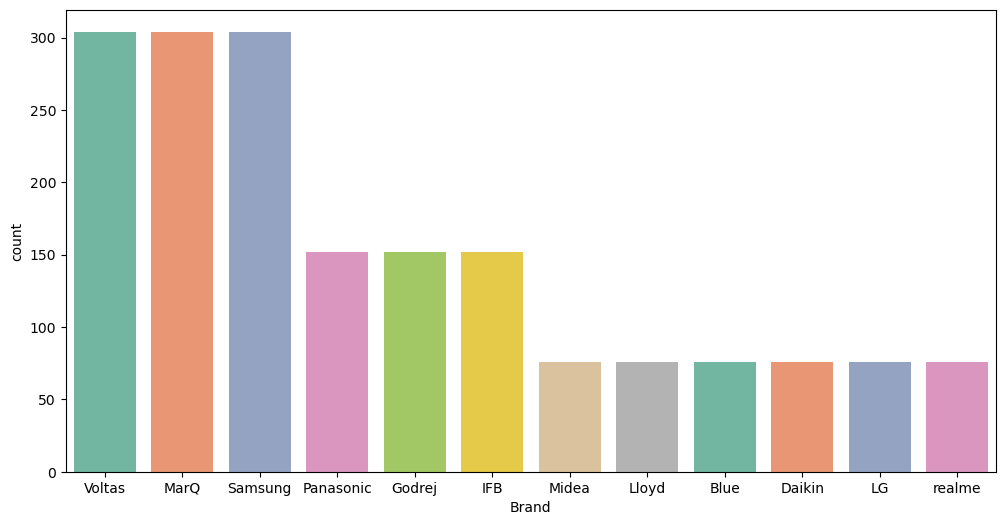

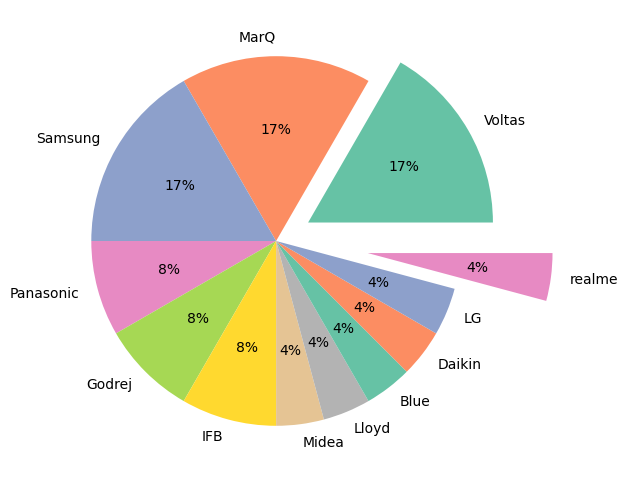

In [57]:
# Get brand counts
brand_counts = df["Brand"].value_counts()
brands = brand_counts.index  # ordered by frequency

# Create enough unique colors for all brands
colour = sns.color_palette("Set2", len(brands))

# --- Countplot ---
plt.figure(figsize=(12,6))
sns.countplot(
    x="Brand", 
    data=df, 
    order=brands,          # same order as pie chart
    hue="Brand", 
    legend=False, 
    palette=dict(zip(brands, colour))   # consistent color mapping
)
plt.show()

# --- Pie chart ---
plt.figure(figsize=(8,6))
plt.pie(
    brand_counts,
    autopct="%.0f%%",
    explode=[0.2] + [0]*(len(brands)-2) + [0.5],  # first & last exploded
    colors=colour,            # same colors as countplot
    labels=brands             # same order as counts
)
plt.show()

### 3.3.1.2. Model

In [14]:
df["Model"].value_counts()

Model
2025    1444
2024     380
Name: count, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20280\1622330917.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "Model", data = df, palette=colour)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_20280\1622330917.py:3: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(x = "Model", data = df, palette=colour)


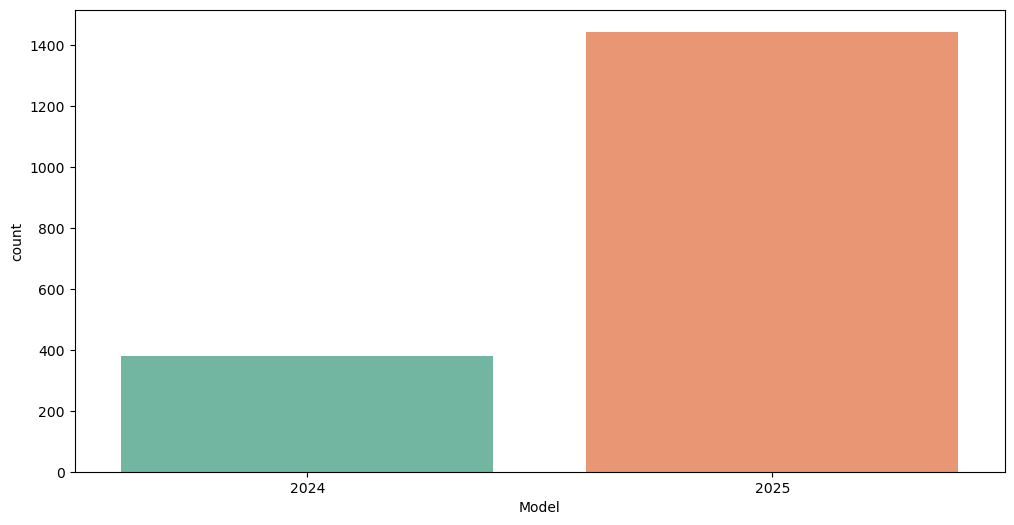

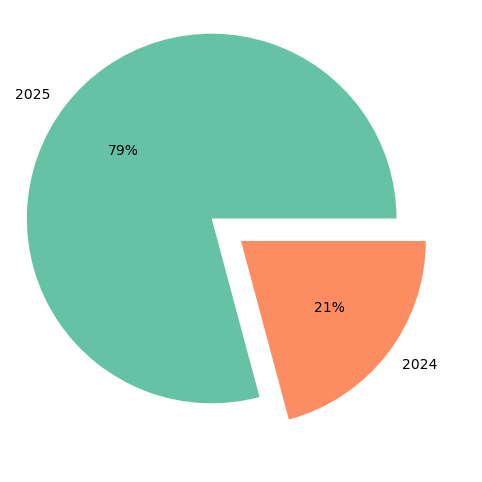

In [36]:
plt.figure(figsize=(12,6))
colour = sns.color_palette("Set2")
sns.countplot(x = "Model", data = df, palette=colour)

plt.figure(figsize=(8,6))
colour = sns.color_palette("Set2")
plt.pie(df["Model"].value_counts(),autopct="%.0f%%",explode=[0.2,0],colors=colour,labels= df["Model"].value_counts().index)
plt.show()

### 3.3.1.3.Capacity

In [39]:
df["Capacity"].value_counts()

Capacity
1.50    1140
1.00     380
2.00     228
0.75      76
Name: count, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17812\4092398283.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Capacity", data=df, palette=colour)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17812\4092398283.py:4: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.countplot(x="Capacity", data=df, palette=colour)


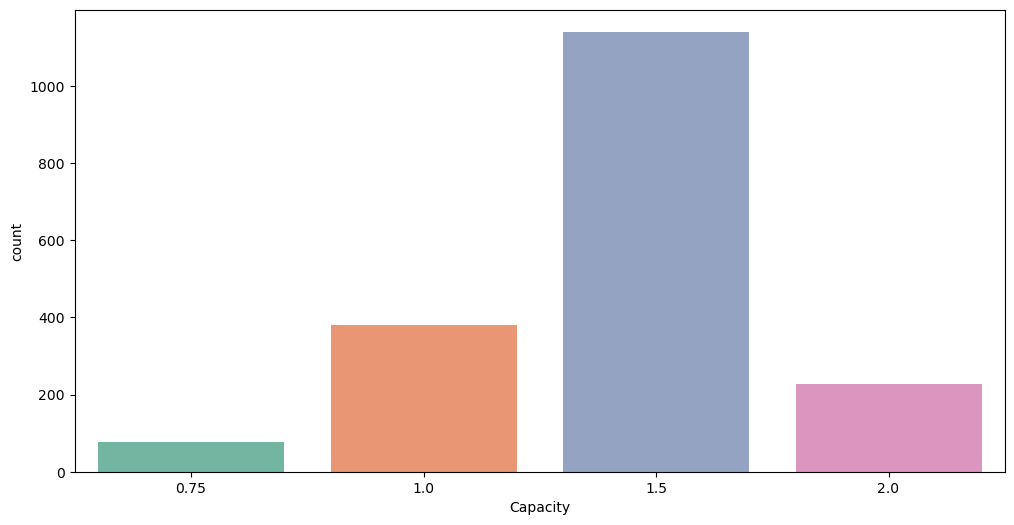

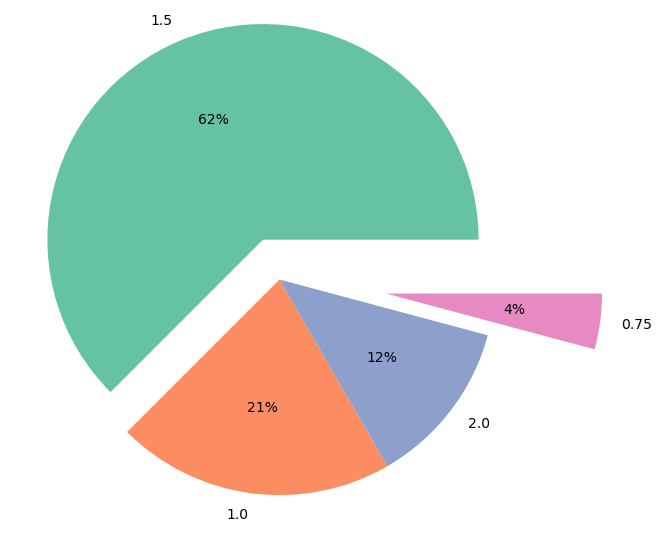

In [42]:
# Countplot
plt.figure(figsize=(12,6))
colour = sns.color_palette("Set2")
sns.countplot(x="Capacity", data=df, palette=colour)
plt.show()   # show separately

# Pie chart
plt.figure(figsize=(7,7))   # new figure for pie chart
colour = sns.color_palette("Set2")
capacity_counts = df["Capacity"].value_counts()

plt.pie(
    capacity_counts,
    autopct="%.0f%%",
    explode=[0.2,0,0,0.5],  # adjust length to match number of categories
    colors=colour,
    labels=capacity_counts.index
)
plt.show()


### 3.3.1.4 Star

In [46]:
df["Star"].value_counts()

Star
3    1064
5     760
Name: count, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20280\3089331591.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "Star", data = df, palette=colour)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_20280\3089331591.py:3: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(x = "Star", data = df, palette=colour)


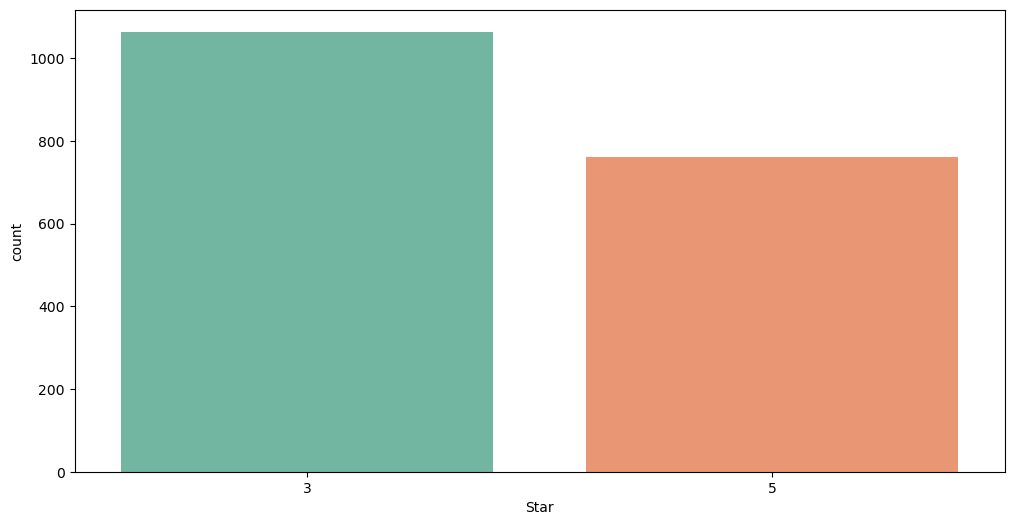

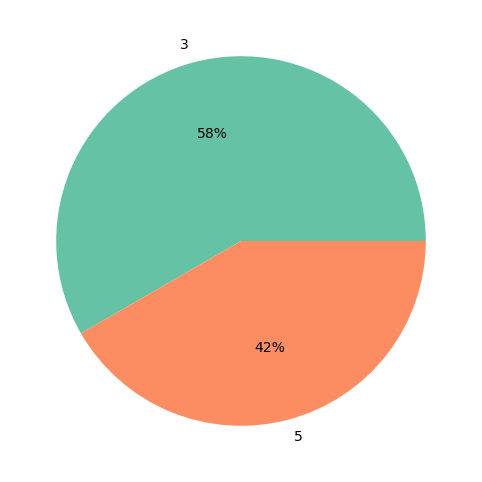

In [48]:
plt.figure(figsize=(12,6))
colour = sns.color_palette("Set2")
sns.countplot(x = "Star", data = df, palette=colour)

plt.figure(figsize=(12,6))
plt.pie(df["Star"].value_counts(),autopct="%.0f%%",explode=[0,0],colors=colour,labels= df["Star"].value_counts().index)
plt.show()

### 3.3.1.5.Inverter

In [49]:
df["Inverter"].value_counts()

Inverter
Yes    1748
No       76
Name: count, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20280\3245815256.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "Inverter", data = df, palette=colour)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_20280\3245815256.py:3: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(x = "Inverter", data = df, palette=colour)


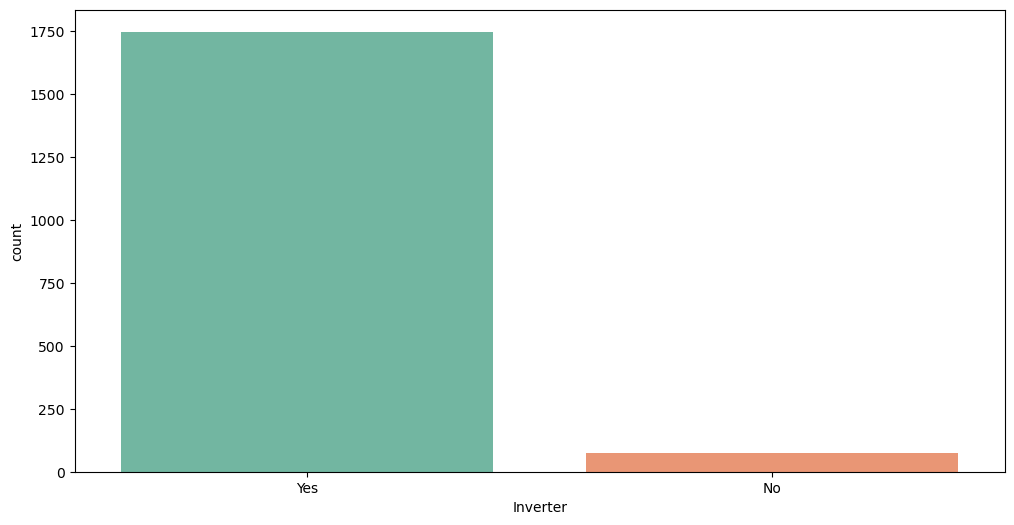

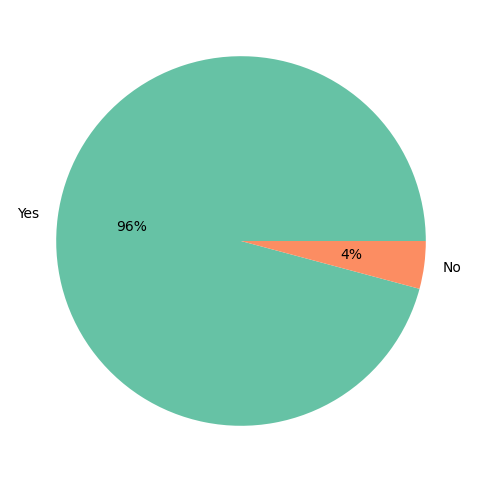

In [50]:
plt.figure(figsize=(12,6))
colour = sns.color_palette("Set2")
sns.countplot(x = "Inverter", data = df, palette=colour)

plt.figure(figsize=(12,6))
plt.pie(df["Inverter"].value_counts(),autopct="%.0f%%",explode=[0,0],colors=colour,labels= df["Inverter"].value_counts().index)
plt.show()

### 3.3.1.6.Units

In [51]:
df["Units"].value_counts()

Units
781.88     152
626.62      76
1252.53     76
728.31      76
744.75      76
951.91      76
1215.59     76
964.10      76
966.47      76
751.28      76
1220.59     76
511.13      76
553.16      76
977.16      76
852.47      76
525.92      76
783.33      76
751.24      76
941.76      76
684.90      76
975.26      76
685.62      76
721.04      76
Name: count, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20280\2463951340.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["Units"], shade=True, color='orange')


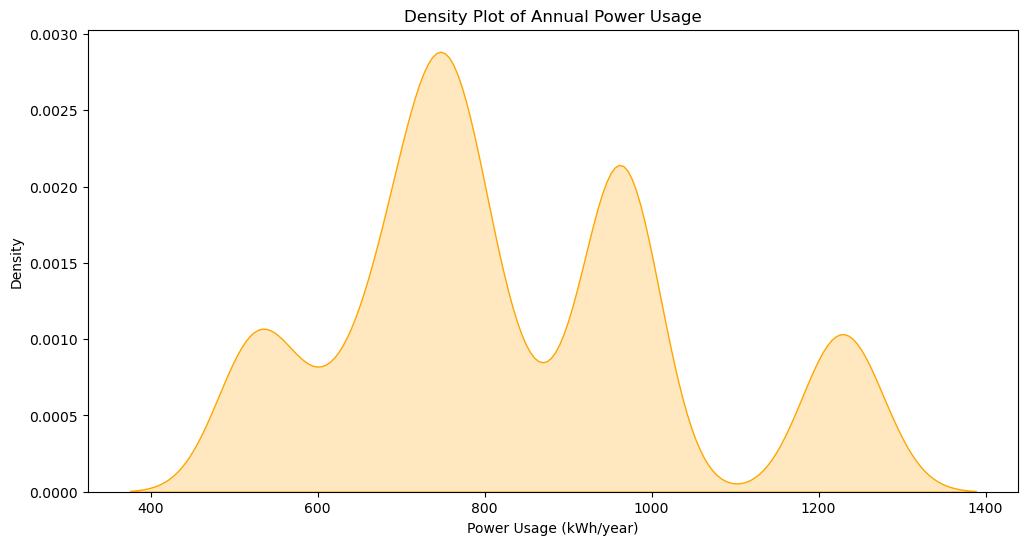

In [63]:
plt.figure(figsize=(12,6))
sns.kdeplot(df["Units"], shade=True, color='orange')
plt.title("Density Plot of Annual Power Usage")
plt.xlabel("Power Usage (kWh/year)")
plt.show()

### 3.3.1.7  AI

In [57]:
df["AI"].value_counts()

AI
No     1216
Yes     608
Name: count, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20280\3128742255.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "AI", data = df, palette=colour)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_20280\3128742255.py:3: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(x = "AI", data = df, palette=colour)


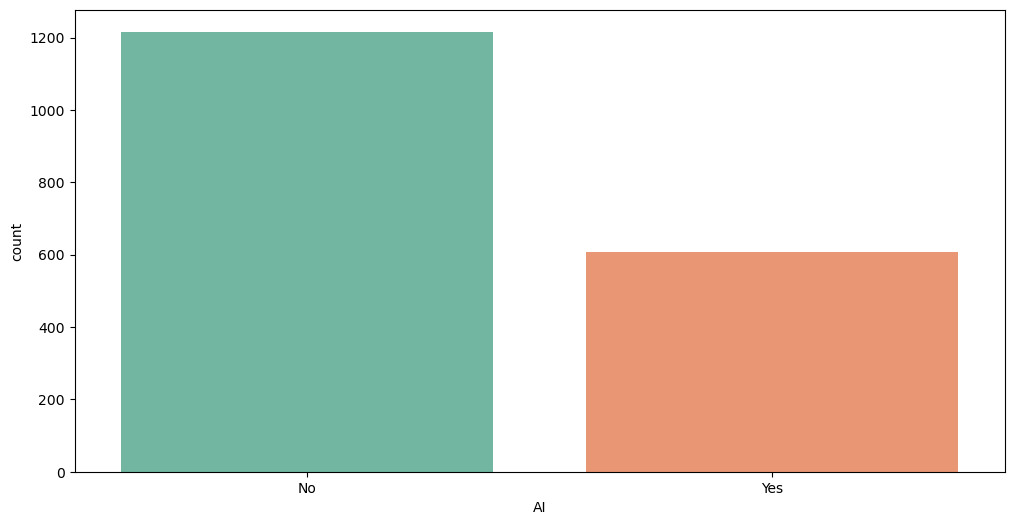

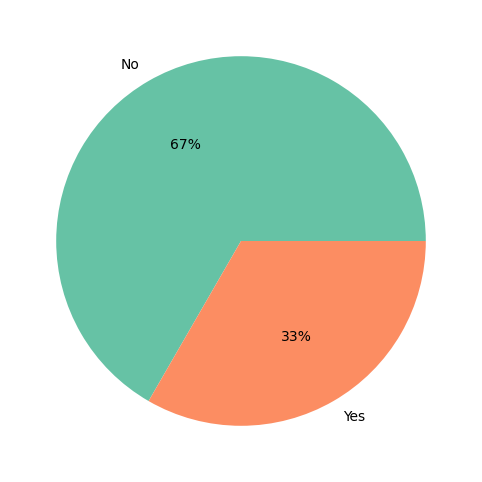

In [58]:
plt.figure(figsize=(12,6))
colour = sns.color_palette("Set2")
sns.countplot(x = "AI", data = df, palette=colour)

plt.figure(figsize=(12,6))
plt.pie(df["AI"].value_counts(),autopct="%.0f%%",explode=[0,0],colors=colour,labels= df["AI"].value_counts().index)
plt.show()

### 3.3.1.8 Room_Size

In [ ]:
df["Size"].value_counts()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20280\772868464.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "Size", data = df, palette=colour)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_20280\772868464.py:3: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.countplot(x = "Size", data = df, palette=colour)


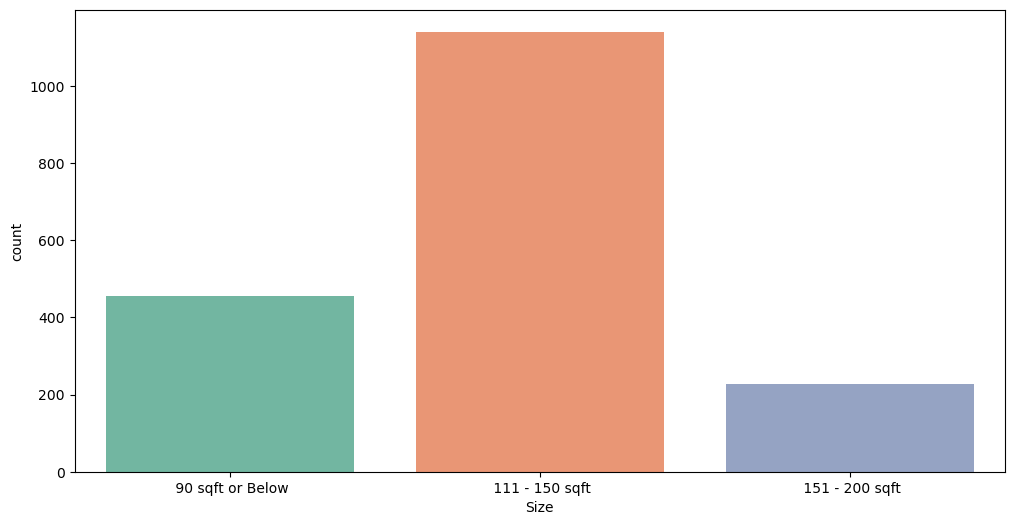

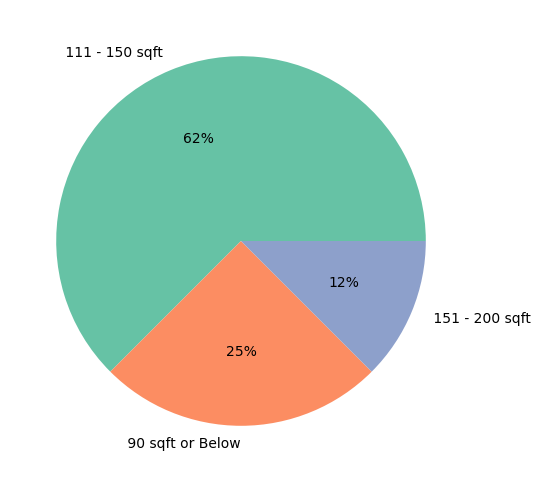

In [60]:
plt.figure(figsize=(12,6))
colour = sns.color_palette("Set2")
sns.countplot(x = "Size", data = df, palette=colour)

plt.figure(figsize=(12,6))
plt.pie(df["Size"].value_counts(),autopct="%.0f%%",explode=[0,0,0],colors=colour,labels= df["Size"].value_counts().index)
plt.show()

### 3.3.1.9 price_tag

In [71]:
df["Price_tag"].value_counts()

Price_tag
High price    1748
Low price       76
Name: count, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20280\1909098080.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "Price_tag", data = df, palette=colour)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_20280\1909098080.py:3: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(x = "Price_tag", data = df, palette=colour)


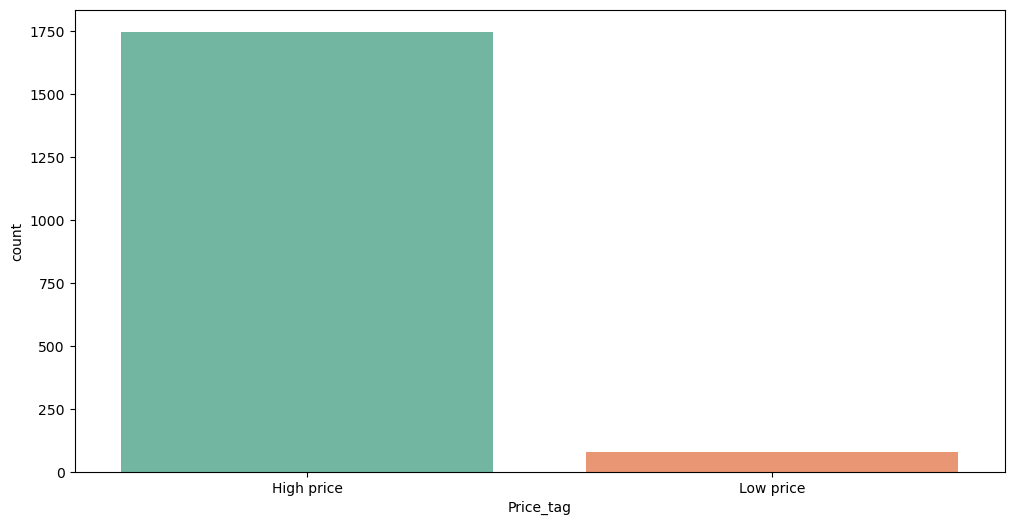

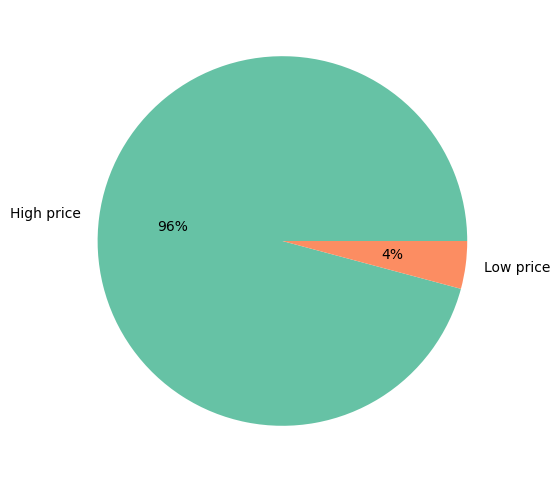

In [70]:
plt.figure(figsize=(12,6))
colour = sns.color_palette("Set2")
sns.countplot(x = "Price_tag", data = df, palette=colour)

plt.figure(figsize=(12,6))
plt.pie(df["Price_tag"].value_counts(),autopct="%.0f%%",explode=[0,0],colors=colour,labels= df["Price_tag"].value_counts().index)
plt.show()

### 3.3.1.10 Price

In [77]:
df["Price"].value_counts()

Price
28990    304
30620     76
40490     76
40590     76
33990     76
41490     76
27990     76
42390     76
24990     76
34490     76
35890     76
33490     76
19490     76
31490     76
35990     76
39990     76
40990     76
29490     76
21990     76
25990     76
34590     76
Name: count, dtype: int64

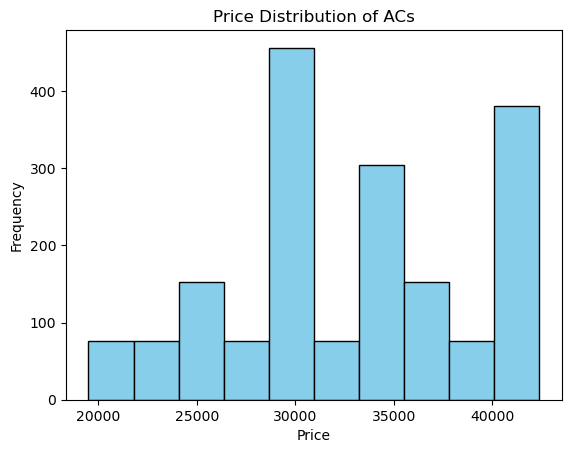

In [20]:
plt.hist(df["Price"], bins=10, color='skyblue', edgecolor='black')
plt.title("Price Distribution of ACs")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20280\4036564333.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "Price", data = df, palette=colour)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_20280\4036564333.py:3: UserWarning: 
The palette list has fewer values (8) than needed (21) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x = "Price", data = df, palette=colour)


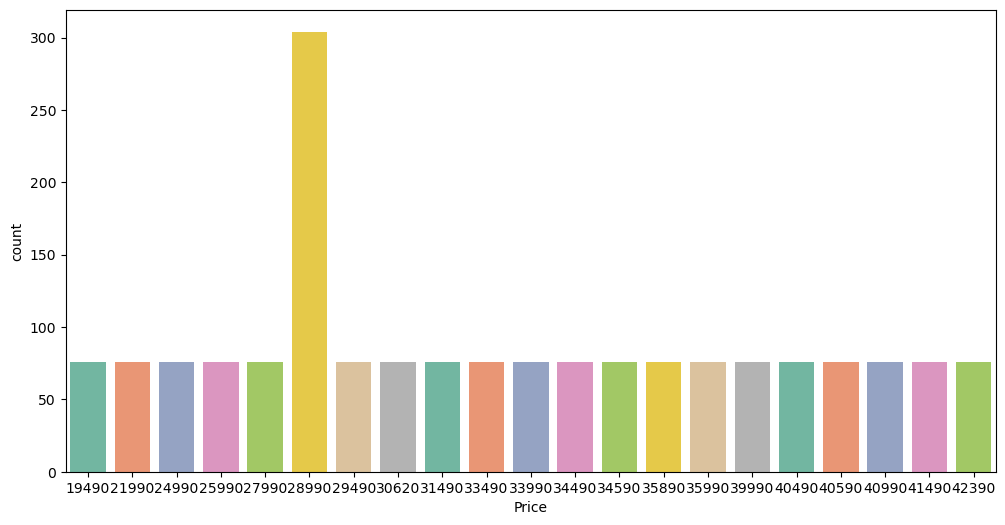

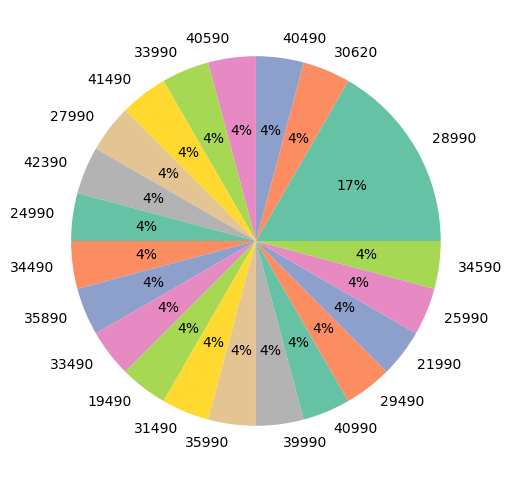

In [78]:
plt.figure(figsize=(12,6))
colour = sns.color_palette("Set2")
sns.countplot(x = "Price", data = df, palette=colour)

plt.figure(figsize=(12,6))
plt.pie(df["Price"].value_counts(),autopct="%.0f%%",explode=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],colors=colour,labels= df["Price"].value_counts().index)
plt.show()

In [67]:
df.columns

Index(['Brand', 'Model', 'Capacity', 'Star', 'Inverter', 'Units', 'AI', 'Size',
       'Price_tag', 'Price'],
      dtype='object')

## 3.3.2 Bivarite

In [304]:
df.groupby("Brand")["Price"].mean()

Brand
Blue         39990.0
Daikin       34490.0
Godrej       30990.0
IFB          37590.0
LG           41490.0
Lloyd        29490.0
MarQ         23865.0
Midea        25990.0
Panasonic    37940.0
Samsung      34365.0
Voltas       33997.5
realme       28990.0
Name: Price, dtype: float64

### 3.3.2.1 brand Vs Price

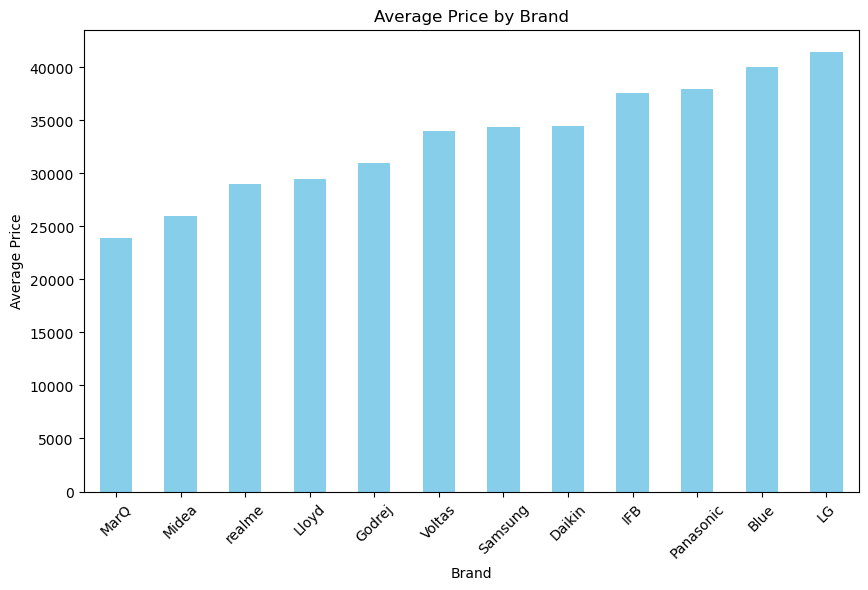

In [68]:
# Compute average price by Brand
avg_price = df.groupby("Brand")["Price"].mean().sort_values()

# Vertical bar chart with Brands on x-axis
avg_price.plot(
    kind="bar",         # vertical bars
    figsize=(10,6),     # wider figure for x-axis labels
    color="skyblue"
)
plt.ylabel("Average Price")
plt.xlabel("Brand")
plt.title("Average Price by Brand")
plt.xticks(rotation=45)  # rotate x labels for readability
plt.show()

### 3.3.2.2 Average price by Bramd

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20280\1773940707.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


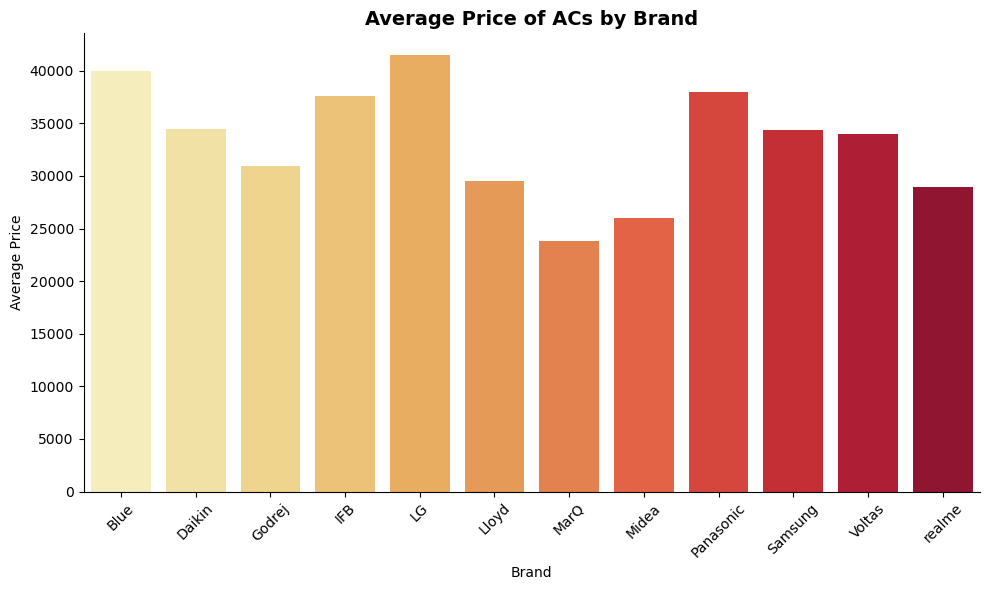

In [99]:
mean_price = df.groupby("Brand")["Price"].mean().reset_index()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(
    data=mean_price,
    x="Brand",
    y="Price",
    palette="YlOrRd"
)

plt.title("Average Price of ACs by Brand", fontsize=14, weight="bold")
plt.xlabel("Brand")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
sns.despine(left=False, bottom=False)
plt.tight_layout()
plt.show()

### 3.3.2.3 Capacity vs Price

In [329]:
df.groupby("Capacity")["Price"].mean()

Capacity
0.75    19490.000000
1.00    28716.000000
1.50    33056.666667
2.00    41156.666667
Name: Price, dtype: float64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17812\3087335688.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


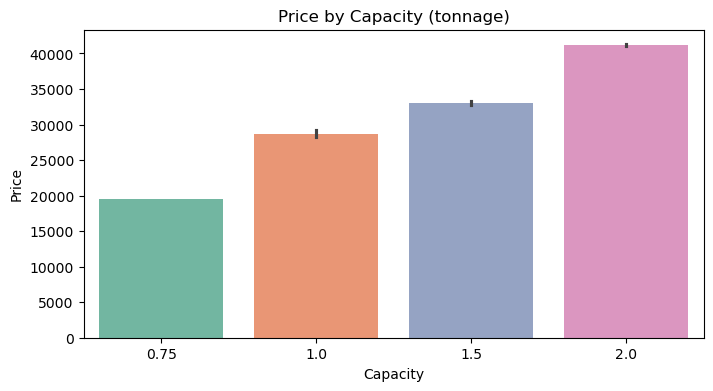

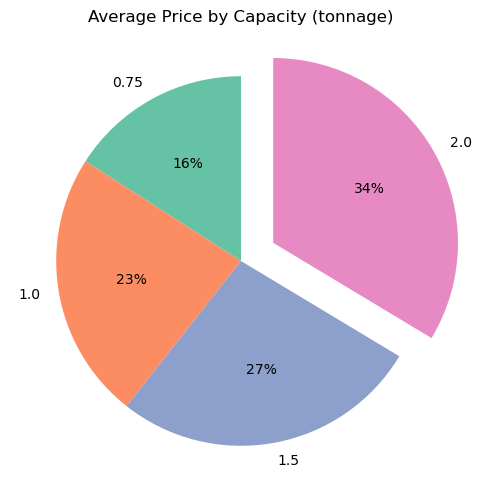

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Capacity to string for consistent mapping
df["Capacity"] = df["Capacity"].astype(str)

# Compute average prices by Capacity
capacity_price = df.groupby("Capacity")["Price"].mean()
capacities = capacity_price.index

# Define colors for capacities (same for barplot and pie chart)
colour = sns.color_palette("Set2")  # adjust length if more categories
color_dict = dict(zip(capacities, colour))

# --- Barplot ---
plt.figure(figsize=(8,4))
sns.barplot(
    data=df,
    x="Capacity",
    y="Price",
    order=capacities,       # same order as pie chart
    palette=color_dict      # consistent colors
)
plt.title("Price by Capacity (tonnage)")
plt.show()

# --- Pie chart ---
plt.figure(figsize=(6,6))
explode = [0.0]*(len(capacities)-1) + [0.2]   # explode last category
plt.pie(
    capacity_price,
    labels=capacities,
    autopct="%.0f%%",
    startangle=90,
    explode=explode,
    colors=[color_dict[c] for c in capacities]  # same colors as barplot
)
plt.title("Average Price by Capacity (tonnage)")
plt.show()

### 3.3.2.4 Star vs Price

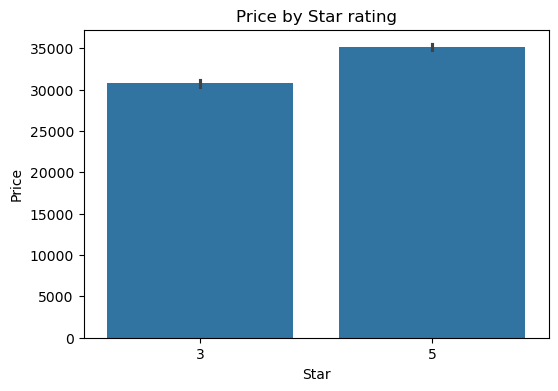

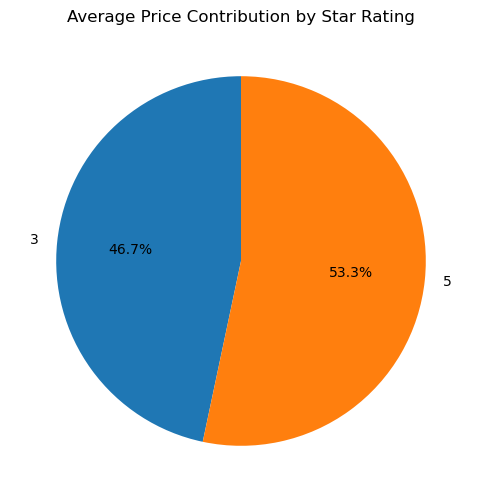

In [60]:
# --- Barplot ---
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='Star', y='Price')
plt.title("Price by Star rating")
plt.show()

# --- Pie chart ---
avg_price = df.groupby("Star")["Price"].mean()
stars = avg_price.index
avg_price_percent = avg_price / avg_price.sum() * 100  # normalize to percentages

plt.figure(figsize=(6,6))
plt.pie(
    avg_price_percent,
    labels=stars,
    autopct="%.1f%%",
    startangle=90
)
plt.title("Average Price Contribution by Star Rating")
plt.show()

### 3.3.2.5 Numeric vs numeric (Price vs Units, Price vs size)

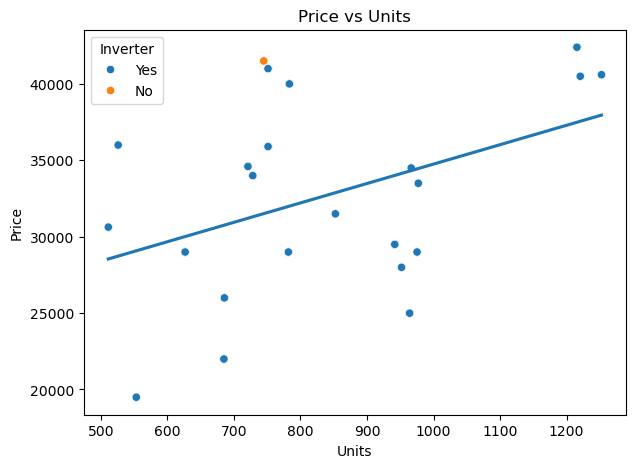

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24708\1022684173.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["size"] = df["Size"].str.extract(r"(\d+)").astype(float)


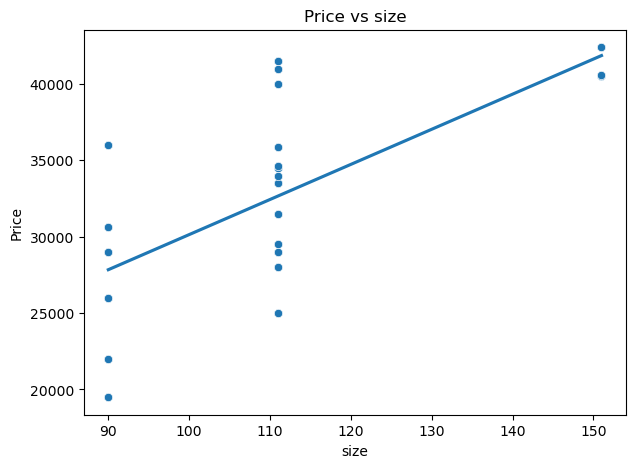

In [356]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='Units', y='Price', hue='Inverter')
sns.regplot(data=df, x='Units', y='Price', scatter=False, ci=None)
plt.title("Price vs Units")
plt.show()

# Extract minimum numeric value from 'Size' column
df["size"] = df["Size"].str.extract(r"(\d+)").astype(float)

plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='size', y='Price')
sns.regplot(data=df, x='size', y='Price', scatter=False, ci=None)
plt.title("Price vs size")
plt.show()

# C vs C

### 3.3.2.6 Count of Inverter and Non-Inverter ACs by Brand

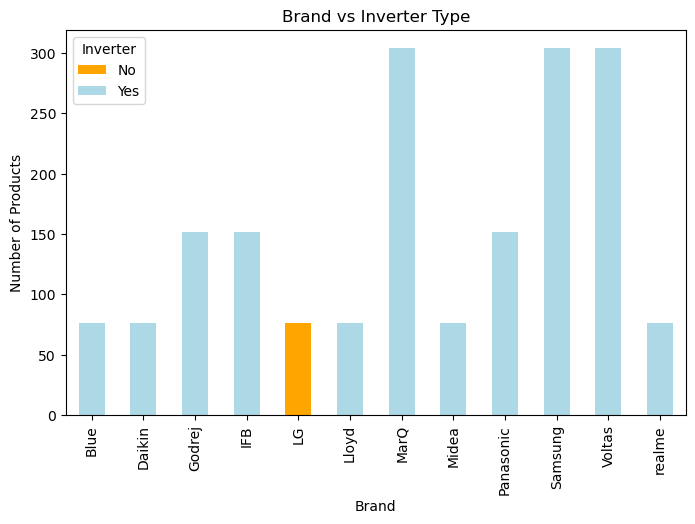

In [102]:
table = pd.crosstab(df["Brand"], df["Inverter"])

# Plot
table.plot(kind='bar', stacked=True, figsize=(8,5), color=["orange",'lightblue'])
plt.title("Brand vs Inverter Type")
plt.xlabel("Brand")
plt.ylabel("Number of Products")
plt.legend(title="Inverter")
plt.show()

### 3.3.2.7 AC Models by Brand and Room Size

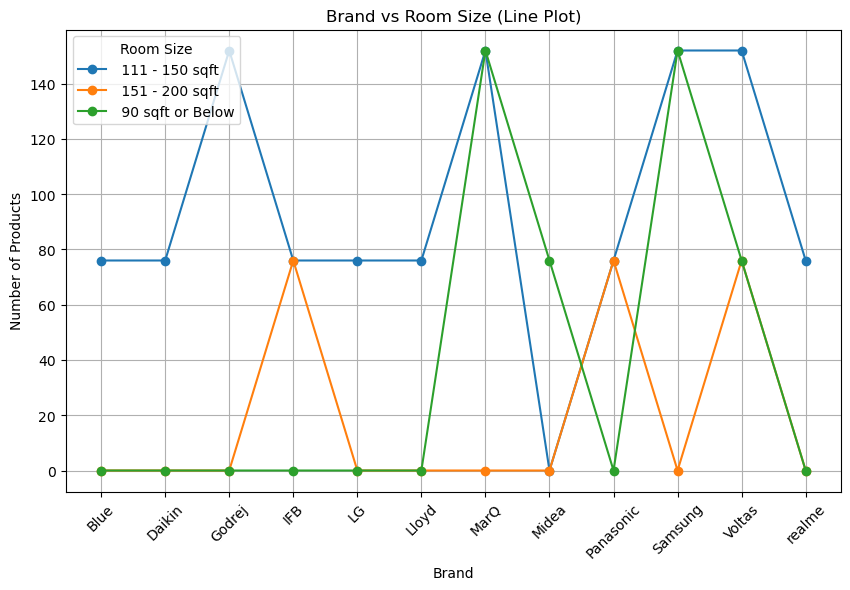

In [104]:
table = pd.crosstab(df["Brand"], df["Size"])

# Line plot
plt.figure(figsize=(10,6))
for room_size in table.columns:
    plt.plot(table.index, table[room_size], marker='o', label=str(room_size))

plt.title("Brand vs Room Size (Line Plot)")
plt.xlabel("Brand")
plt.ylabel("Number of Products")
plt.xticks(rotation=45)
plt.legend(title="Room Size")
plt.grid(True)
plt.show()

### 3.3.2.8 Count of AC Models per Brand by Price

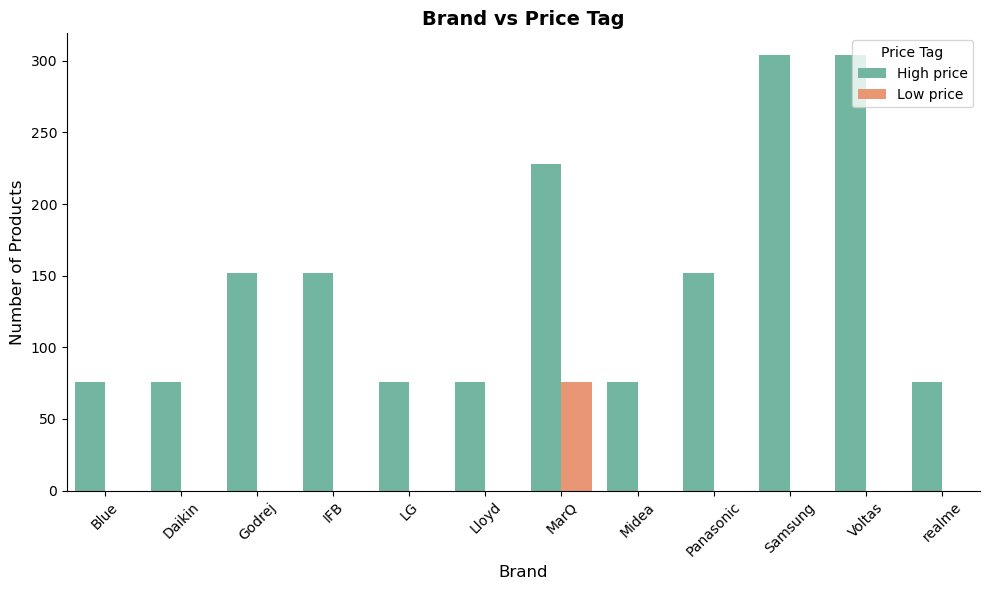

In [106]:
table = pd.crosstab(df["Brand"], df["Price_tag"])

# Melt into long format for Seaborn
table_melted = table.reset_index().melt(
    id_vars="Brand", 
    var_name="Price tag", 
    value_name="Count"
)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(
    data=table_melted,
    x="Brand",
    y="Count",
    hue="Price tag",
    palette="Set2"
)

# Styling
plt.title("Brand vs Price Tag", fontsize=14, weight="bold")
plt.xlabel("Brand", fontsize=12)
plt.ylabel("Number of Products", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Price Tag", loc="upper right")
sns.despine(left=False, bottom=False)
plt.tight_layout()
plt.show()


### 3.3.2.9 Count on Ac's with AI

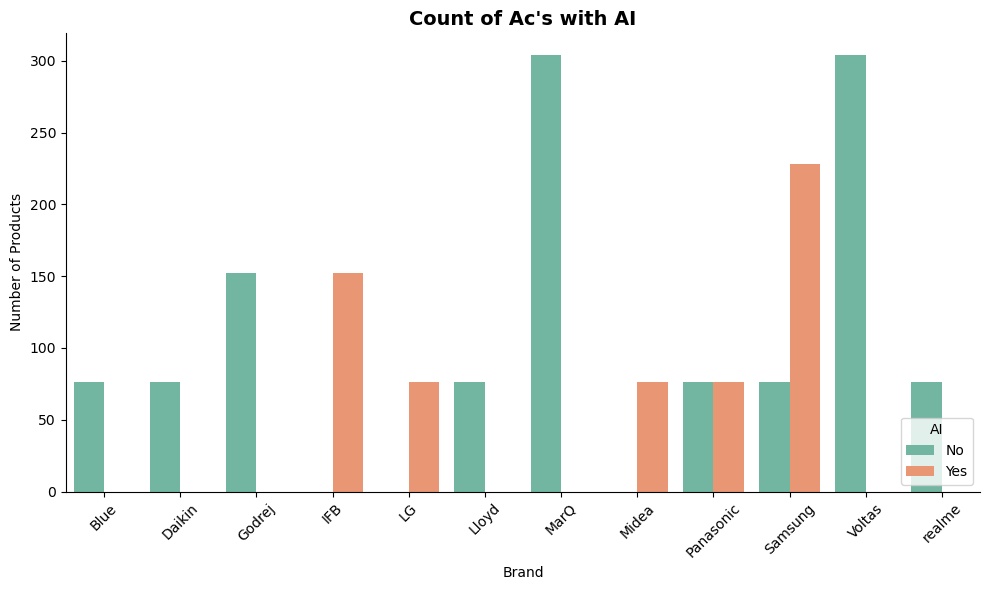

In [107]:
table = pd.crosstab(df["Brand"], df["AI"])
table = table.reset_index().melt(id_vars="Brand", var_name="AI", value_name="Count")

# Plot
plt.figure(figsize=(10,6))
sns.barplot(
    data=table,
    y="Count",
    x="Brand",
    hue="AI",
    palette="Set2"
)

plt.title("Count of Ac's with AI", fontsize=14, weight="bold")
plt.xlabel("Brand")
plt.ylabel("Number of Products")
plt.xticks(rotation=45)
plt.legend(title="AI", loc="lower right")

sns.despine(left=False, bottom=False)
plt.tight_layout()
plt.show()

# C vs N

### 3.3.2.10 Average price of each brand

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7964\1773940707.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


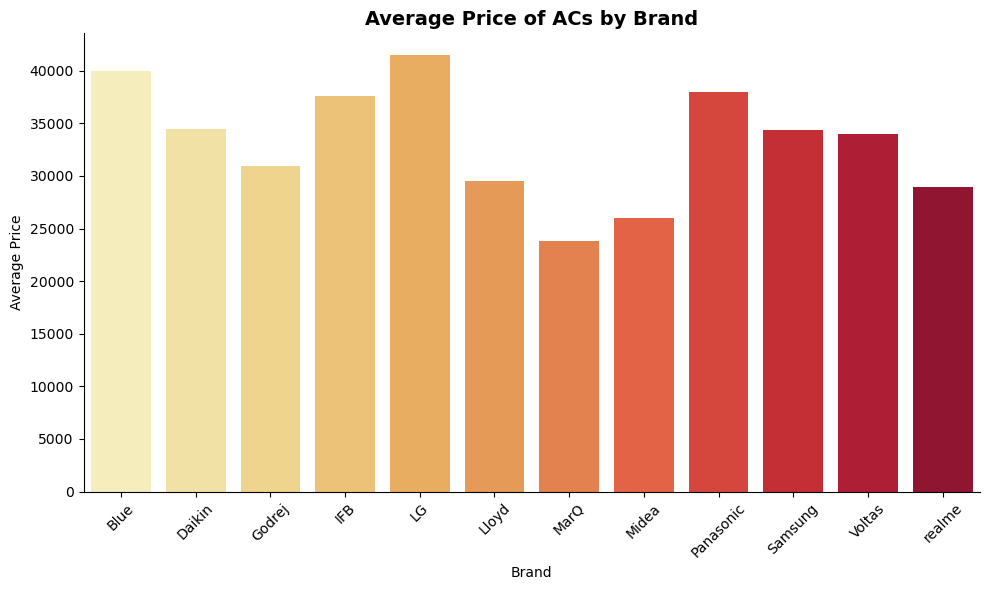

In [21]:
mean_price = df.groupby("Brand")["Price"].mean().reset_index()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(
    data=mean_price,
    x="Brand",
    y="Price",
    palette="YlOrRd"
)

plt.title("Average Price of ACs by Brand", fontsize=14, weight="bold")
plt.xlabel("Brand")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
sns.despine(left=False, bottom=False)
plt.tight_layout()
plt.show()

### 3.3.2.11 Average Units for each brand

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7964\1493919221.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Brand", y="Units", data=mean_power, palette="viridis")


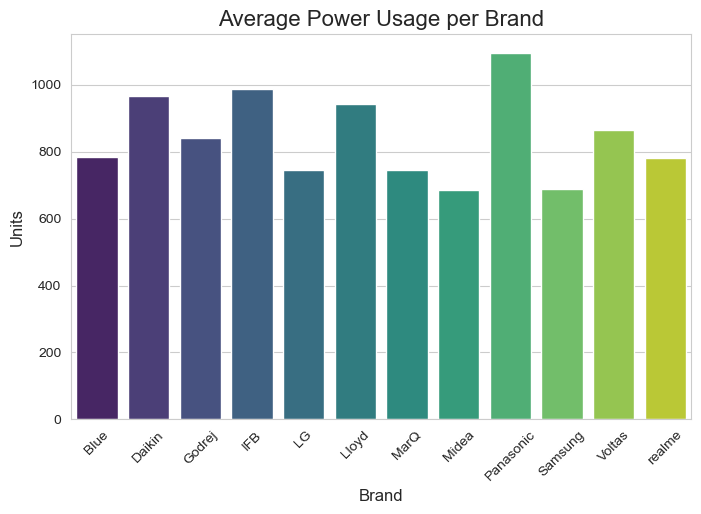

In [25]:
mean_power = df.groupby("Brand")["Units"].mean().reset_index()

# Seaborn bar plot
sns.set_style("whitegrid")  # cleaner background
plt.figure(figsize=(8,5))
sns.barplot(x="Brand", y="Units", data=mean_power, palette="viridis")
plt.title("Average Power Usage per Brand", fontsize=16)
plt.xlabel("Brand", fontsize=12)
plt.ylabel("Units", fontsize=12)
plt.xticks(rotation=45)  # rotate brand names if long
plt.show()

### 3.3.2.12 Average power usage based on price tag

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20280\3727877586.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Price_tag", x="Units", data=mean_power, palette="coolwarm")


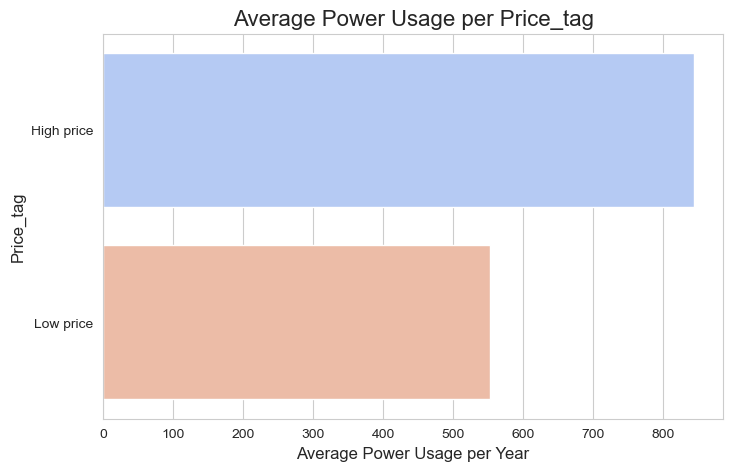

In [116]:
mean_power = df.groupby("Price_tag")["Units"].mean().reset_index()

# Plot (horizontal bar plot)
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
sns.barplot(y="Price_tag", x="Units", data=mean_power, palette="coolwarm")

plt.title("Average Power Usage per Price_tag", fontsize=16)
plt.xlabel("Average Power Usage per Year", fontsize=12)
plt.ylabel("Price_tag", fontsize=12)
plt.show()

### 3.3.2.13 Average price based on stars

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20280\1638865940.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Star", x="Price", data=avg_price, palette="crest")


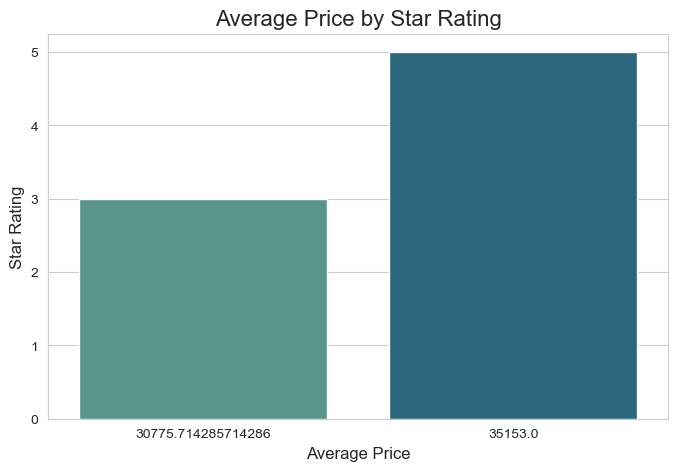

In [117]:
avg_price = df.groupby("Star")["Price"].mean().reset_index()

# Plot
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
sns.barplot(y="Star", x="Price", data=avg_price, palette="crest")

plt.title("Average Price by Star Rating", fontsize=16)
plt.xlabel("Average Price", fontsize=12)
plt.ylabel("Star Rating", fontsize=12)
plt.show()

### 3.3.2.14 Average power usage based on stars

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7964\175928581.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


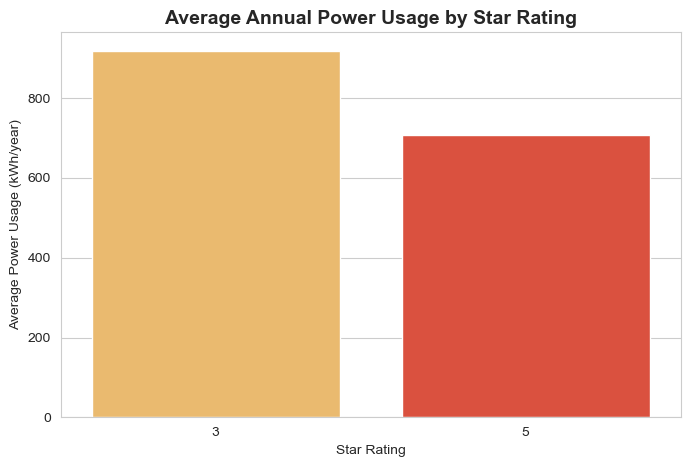

In [35]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=avg_power,
    x="Star",
    y="Units",
    palette="YlOrRd"
)
plt.title("Average Annual Power Usage by Star Rating", fontsize=14, weight="bold")
plt.xlabel("Star Rating")
plt.ylabel("Average Power Usage (kWh/year)")
plt.show()


### 3.3.2.15 Average price if it inverter

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20280\2946273583.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


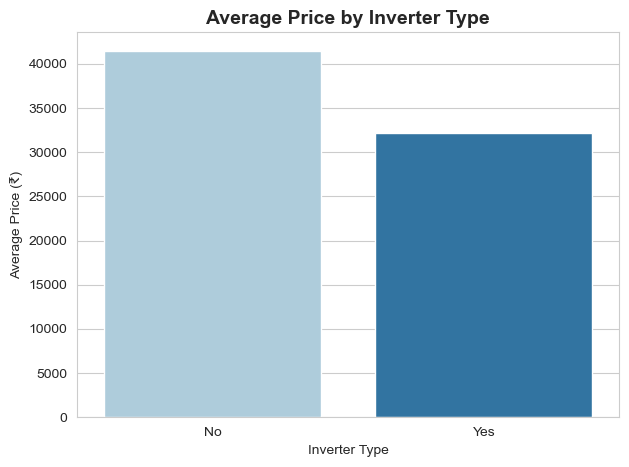

In [120]:
avg_price = df.groupby("Inverter")["Price"].mean().reset_index()

plt.figure(figsize=(7,5))
sns.barplot(
    data=avg_price,
    x="Inverter",
    y="Price",
    palette="Paired"
)
plt.title("Average Price by Inverter Type", fontsize=14, weight="bold")
plt.xlabel("Inverter Type")
plt.ylabel("Average Price (₹)")
plt.show()

### 3.3.2.16 Room side based on average price

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7964\796311939.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


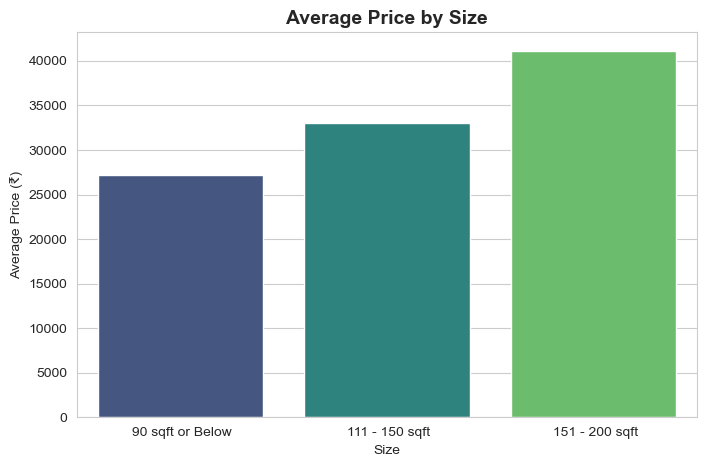

In [36]:
avg_price = df.groupby("Size")["Price"].mean().reset_index()
avg_price = avg_price.sort_values(by="Price", ascending=True)
plt.figure(figsize=(8,5))
sns.barplot(
    data=avg_price,
    x="Size",
    y="Price",
    palette="viridis"
)
plt.title("Average Price by Size", fontsize=14, weight="bold")
plt.xlabel("Size")
plt.ylabel("Average Price (₹)")
plt.show()

### 3.3.2.17 Average capcity of tons based on price tag

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20280\3796542840.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


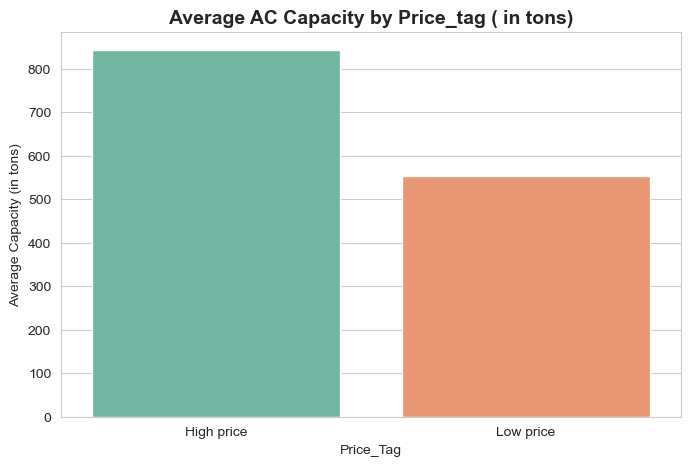

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Calculate mean capacity per Price_tag
avg_capacity = df.groupby("Price_tag")["Units"].mean().reset_index()

# Step 2: Sort descending
avg_capacity = avg_capacity.sort_values(by="Units", ascending=False)

# Step 3: Plot
plt.figure(figsize=(8,5))
sns.barplot(
    data=avg_capacity,
    x="Price_tag",
    y="Units",
    palette="Set2"
)
plt.title("Average AC Capacity by Price_tag ( in tons)", fontsize=14, weight="bold")
plt.xlabel("Price_Tag")
plt.ylabel("Average Capacity (in tons)")
plt.show()

### 3.3.2.18 Room size vs Units

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20280\3757257782.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


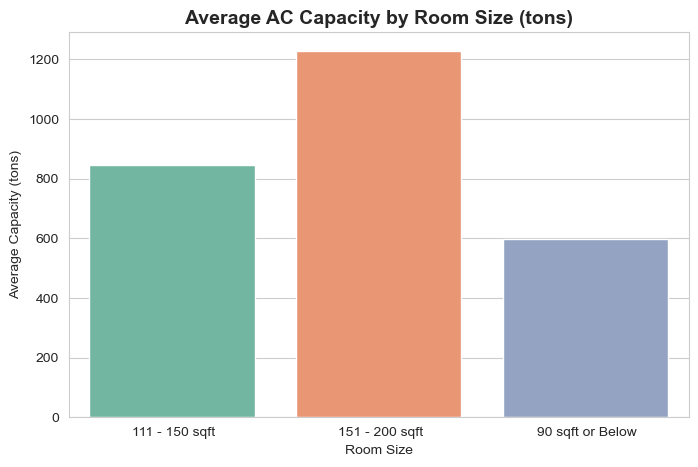

In [129]:
avg_capacity = df.groupby("Size")["Units"].mean().reset_index()


# Plot
plt.figure(figsize=(8,5))
sns.barplot(
    data=avg_capacity,
    x="Size",
    y="Units",
    palette="Set2"
)
plt.title("Average AC Capacity by Room Size (tons)", fontsize=14, weight="bold")
plt.xlabel("Room Size")
plt.ylabel("Average Capacity (tons)")
plt.show()

### 3.3.2.19 Min, Max and average price of each brand

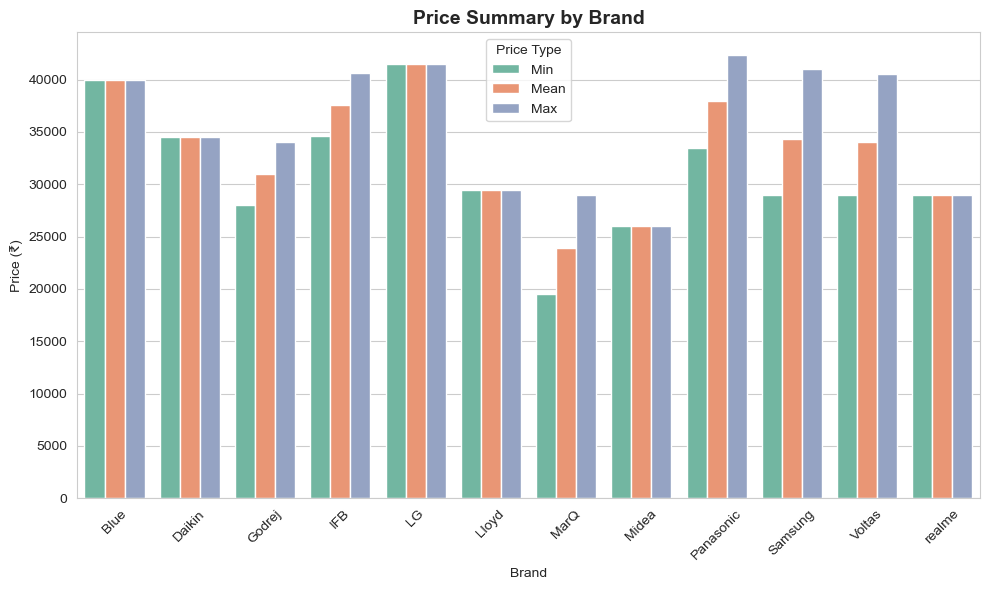

In [130]:
pivot = df.pivot_table(values='Price', index='Brand', aggfunc=['min','mean','max']).reset_index()
pivot.columns = ['Brand','Min','Mean','Max']  # Flatten columns

# Melt for Seaborn
pivot_melted = pivot.melt(id_vars='Brand', var_name='Price Type', value_name='Price')

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=pivot_melted, x='Brand', y='Price', hue='Price Type', palette='Set2')

plt.title("Price Summary by Brand", fontsize=14, weight="bold")
plt.xlabel("Brand")
plt.ylabel("Price (₹)")
plt.xticks(rotation=45)
plt.legend(title="Price Type")
plt.tight_layout()
plt.show()

# N vs N

### 3.3.2.20 Mean, Min and Max Ac capacity by model

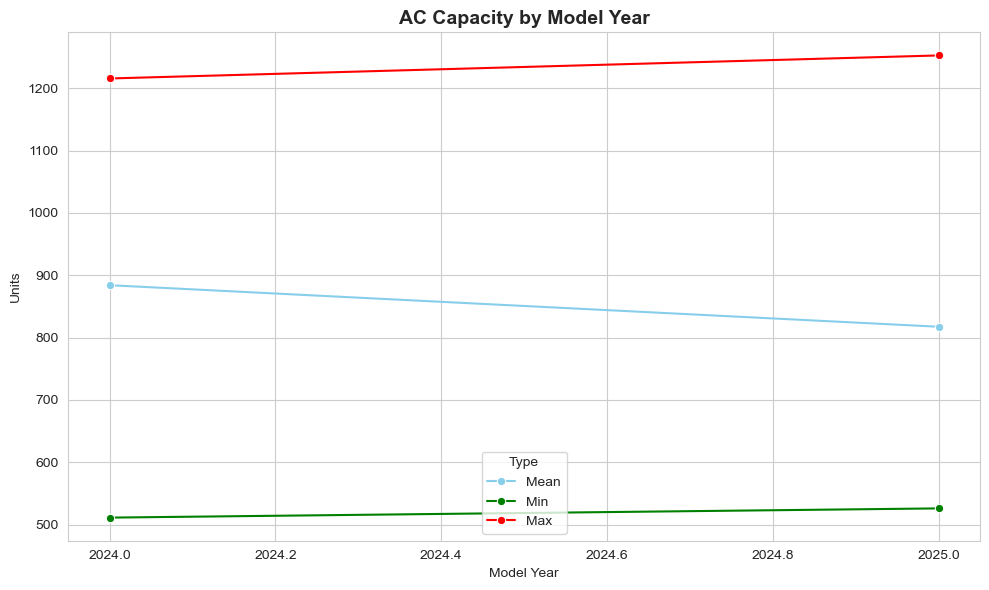

In [131]:
# Pivot table
pivot = df.pivot_table(values='Units', index='Model', aggfunc=['mean','min','max']).reset_index()
pivot.columns = ['Model','Mean','Min','Max']

plt.figure(figsize=(10,6))
sns.lineplot(data=pivot, x='Model', y='Mean', marker='o', label='Mean', color='skyblue')
sns.lineplot(data=pivot, x='Model', y='Min', marker='o', label='Min', color='green')
sns.lineplot(data=pivot, x='Model', y='Max', marker='o', label='Max', color='red')

plt.title("AC Capacity by Model Year", fontsize=14, weight="bold")
plt.xlabel("Model Year")
plt.ylabel("Units")
plt.legend(title="Type")
plt.grid(True)
plt.tight_layout()
plt.show()


### 3.3.2.21 Mean, Min and Max Ac capacity by star rating

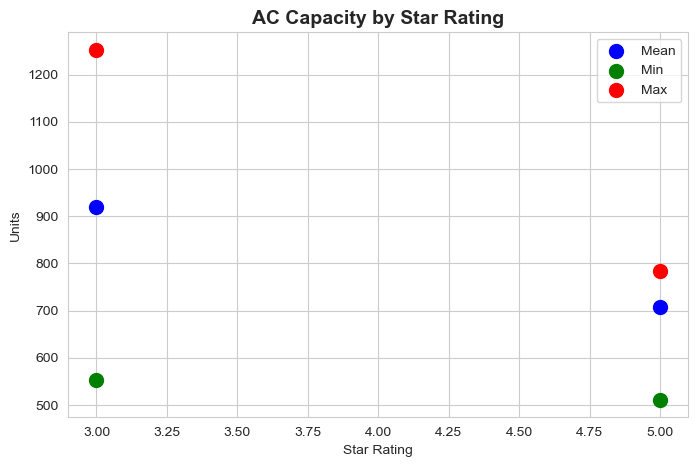

In [132]:
pivot = df.pivot_table(values='Units', index='Star', aggfunc=['mean','min','max'])
pivot.columns = ['Mean Capacity', 'Min Capacity', 'Max Capacity']
pivot.reset_index(inplace=True)
plt.figure(figsize=(8,5))

plt.scatter(pivot['Star'], pivot['Mean Capacity'], color='blue', label='Mean', s=100)
plt.scatter(pivot['Star'], pivot['Min Capacity'], color='green', label='Min', s=100)
plt.scatter(pivot['Star'], pivot['Max Capacity'], color='red', label='Max', s=100)

plt.title("AC Capacity by Star Rating", fontsize=14, weight="bold")
plt.xlabel("Star Rating")
plt.ylabel("Units")
plt.legend()
plt.show()

### 3.3.2.22 Average power usage per annually based on star rating

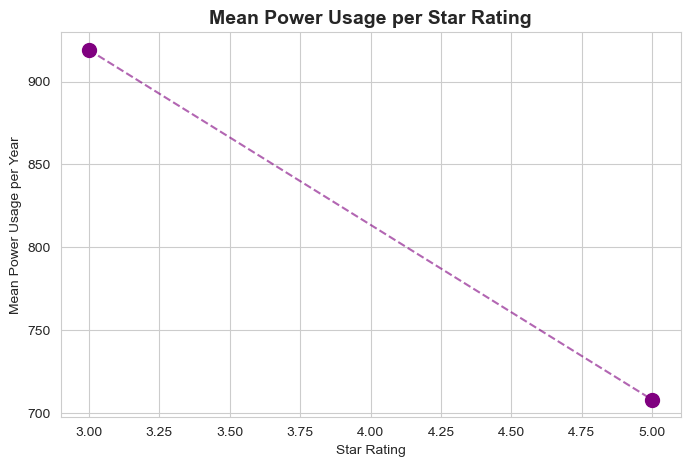

In [134]:
pivot_power = df.pivot_table(
    values='Units',
    index='Star',
    aggfunc='mean'  # mean only
)

# Optional: reset index for easier plotting
pivot_power.reset_index(inplace=True)
pivot_power.columns = ['Star', 'Mean Power Usage']
pivot_power
plt.figure(figsize=(8,5))
plt.scatter(pivot_power['Star'], pivot_power['Mean Power Usage'], color='purple', s=100)
plt.plot(pivot_power['Star'], pivot_power['Mean Power Usage'], color='purple', linestyle='--', alpha=0.6)

plt.title("Mean Power Usage per Star Rating", fontsize=14, fontweight='bold')
plt.xlabel("Star Rating")
plt.ylabel("Mean Power Usage per Year")
plt.grid(True)
plt.show()

# Multivariate analysis

### 3.3.2.23 Average price based on brand and model

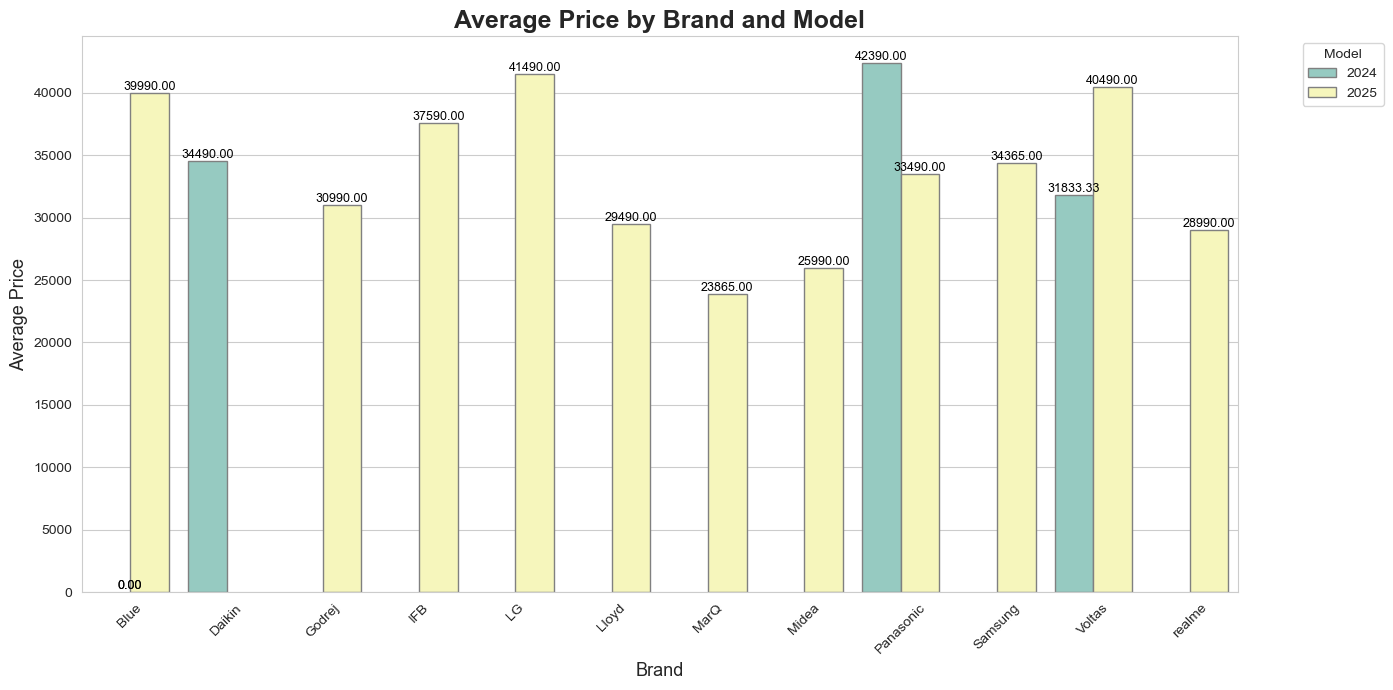

In [135]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot table
pivot = df.pivot_table(values='Price', index='Brand', columns='Model', aggfunc='mean')

# Reset index to make 'Brand' a column
pivot.reset_index(inplace=True)

# Flatten columns, but keep 'Brand' intact
pivot.columns = ['Brand' if col=='Brand' else f"mean_{col}" for col in pivot.columns]

# Melt to long format
pivot_melted = pivot.melt(id_vars='Brand', var_name='Model', value_name='Price')
pivot_melted['Model'] = pivot_melted['Model'].str.replace('mean_', '')

# Seaborn style
sns.set_style("whitegrid")
plt.figure(figsize=(14,7))

# Bar plot
bar_plot = sns.barplot(
    data=pivot_melted,
    x='Brand',
    y='Price',
    hue='Model',
    palette='Set3',
    edgecolor='gray'
)

# Add data labels on top of bars
for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.annotate(f'{height:.2f}', 
                      (p.get_x() + p.get_width() / 2., height), 
                      ha='center', va='bottom', fontsize=9, color='black')

# Titles and labels
plt.title('Average Price by Brand and Model', fontsize=18, weight='bold')
plt.xlabel('Brand', fontsize=13)
plt.ylabel('Average Price', fontsize=13)
plt.xticks(rotation=45)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### 3.3.2.24 Average Units based on star rating and room size

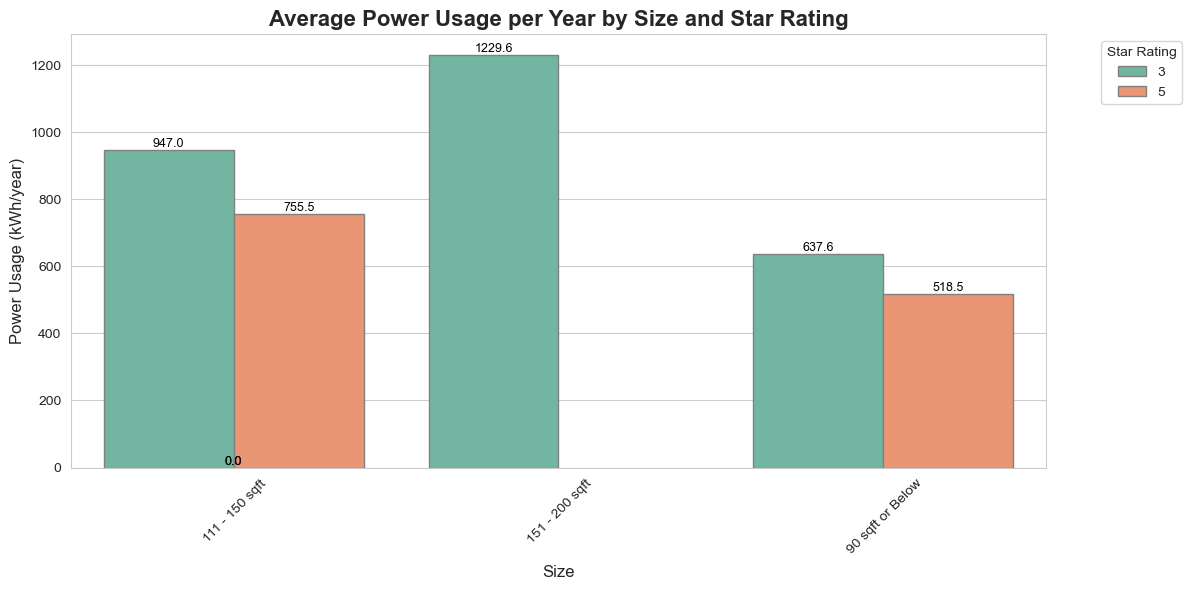

In [138]:
pivot = df.pivot_table(
    values='Units',
    index='Size',
    columns='Star',
    aggfunc='mean'
)

pivot.reset_index(inplace=True)

pivot.columns = ['Size' if col=='Size' else f"mean_{col}" for col in pivot.columns]
pivot_melted = pivot.melt(id_vars='Size', var_name='Star', value_name='Power usage')
pivot_melted['Star'] = pivot_melted['Star'].str.replace('mean_', '')
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.figure(figsize=(12,6))

bar_plot = sns.barplot(
    data=pivot_melted,
    x='Size',
    y='Power usage',
    hue='Star',
    palette='Set2',
    edgecolor='gray'
)

# Add value labels
for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.annotate(f'{height:.1f}', 
                      (p.get_x() + p.get_width() / 2., height), 
                      ha='center', va='bottom', fontsize=9, color='black')

plt.title('Average Power Usage per Year by Size and Star Rating', fontsize=16, weight='bold')
plt.xlabel('Size', fontsize=12)
plt.ylabel('Power Usage (kWh/year)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Star Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### 3.3.2.25 Average price based on Capacity and AI features

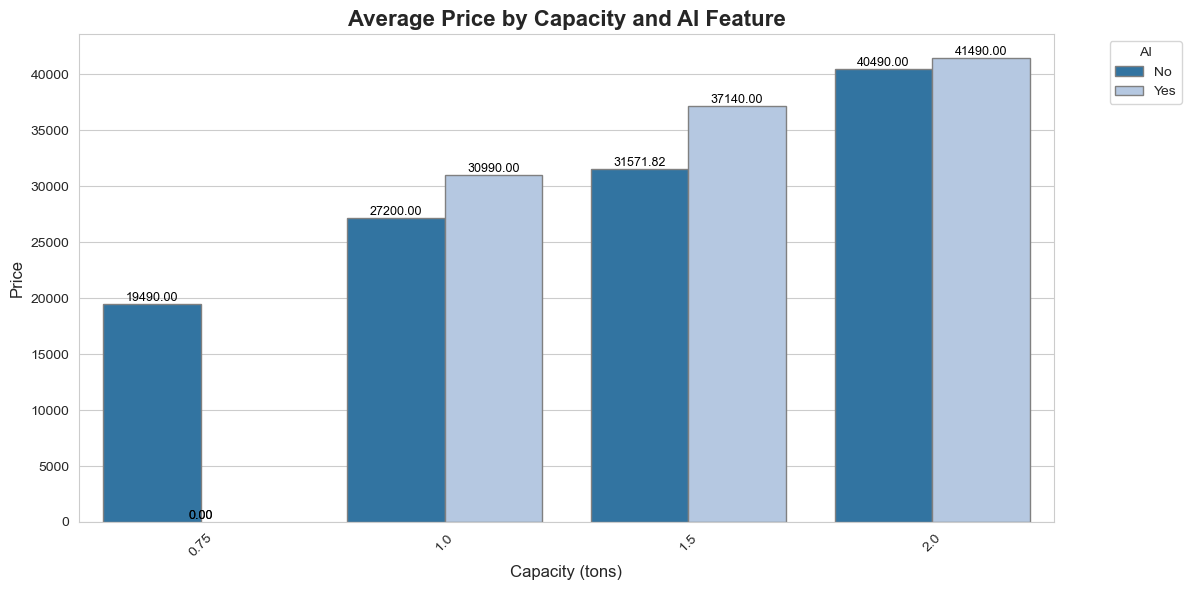

In [42]:
pivot = df.pivot_table(
    values='Price',
    index='Capacity',
    columns='AI',
    aggfunc='mean'
)

# Reset index to make 'Units' a column
pivot.reset_index(inplace=True)

# Flatten columns
pivot.columns = ['Capacity' if col=='Capacity' else f"mean_{col}" for col in pivot.columns]

pivot_melted = pivot.melt(id_vars='Capacity', var_name='AI', value_name='Price')
pivot_melted['AI'] = pivot_melted['AI'].str.replace('mean_', '')
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.figure(figsize=(12,6))

bar_plot = sns.barplot(
    data=pivot_melted,
    x='Capacity',
    y='Price',
    hue='AI',
    palette='tab20',       # Soft and appealing colors
    edgecolor='gray'
)

# Add value labels
for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.annotate(f'{height:.2f}', 
                      (p.get_x() + p.get_width() / 2., height), 
                      ha='center', va='bottom', fontsize=9, color='black')

plt.title('Average Price by Capacity and AI Feature', fontsize=16, weight='bold')
plt.xlabel('Capacity (tons)', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='AI', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

